In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from tqdm import tqdm
import viznet
import os
from NeuralNetwork import NeuralNetwork

In [2]:
train_samples = 5000

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation].reshape(-1, 1)
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train).astype(np.float64)
y_test = encoder.transform(y_test).astype(np.float64)

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Pengaruh Fungsi Aktivasi

Training Progress:   5%|▌         | 1/20 [00:02<00:48,  2.58s/it]

Epoch 0/20 - Train Loss: 15.0075 - Val Loss: 12.053889405096669


Training Progress:  15%|█▌        | 3/20 [00:07<00:42,  2.51s/it]

Epoch 2/20 - Train Loss: 8.2950 - Val Loss: 7.765816267531442


Training Progress:  25%|██▌       | 5/20 [00:11<00:34,  2.29s/it]

Epoch 4/20 - Train Loss: 6.3485 - Val Loss: 6.337958810849319


Training Progress:  35%|███▌      | 7/20 [00:15<00:26,  2.07s/it]

Epoch 6/20 - Train Loss: 5.3437 - Val Loss: 5.476920106615701


Training Progress:  45%|████▌     | 9/20 [00:19<00:21,  1.92s/it]

Epoch 8/20 - Train Loss: 4.7318 - Val Loss: 4.982318830444137


Training Progress:  55%|█████▌    | 11/20 [00:23<00:17,  1.98s/it]

Epoch 10/20 - Train Loss: 4.3045 - Val Loss: 4.592975231222506


Training Progress:  65%|██████▌   | 13/20 [00:31<00:21,  3.04s/it]

Epoch 12/20 - Train Loss: 3.9914 - Val Loss: 4.309334664668678


Training Progress:  75%|███████▌  | 15/20 [00:40<00:18,  3.72s/it]

Epoch 14/20 - Train Loss: 3.7404 - Val Loss: 4.1654234688085285


Training Progress:  85%|████████▌ | 17/20 [00:45<00:09,  3.08s/it]

Epoch 16/20 - Train Loss: 3.5566 - Val Loss: 3.9361662511673474


Training Progress:  95%|█████████▌| 19/20 [00:48<00:02,  2.47s/it]

Epoch 18/20 - Train Loss: 3.3716 - Val Loss: 3.7825575790023738


Training Progress: 100%|██████████| 20/20 [00:50<00:00,  2.54s/it]


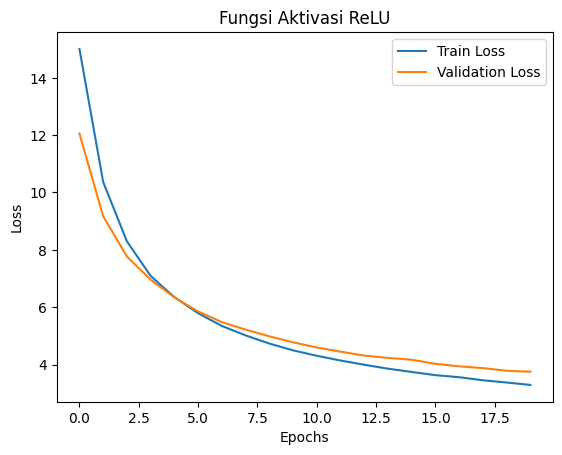

Validation Loss akhir perlatihan : 3.747689388086874


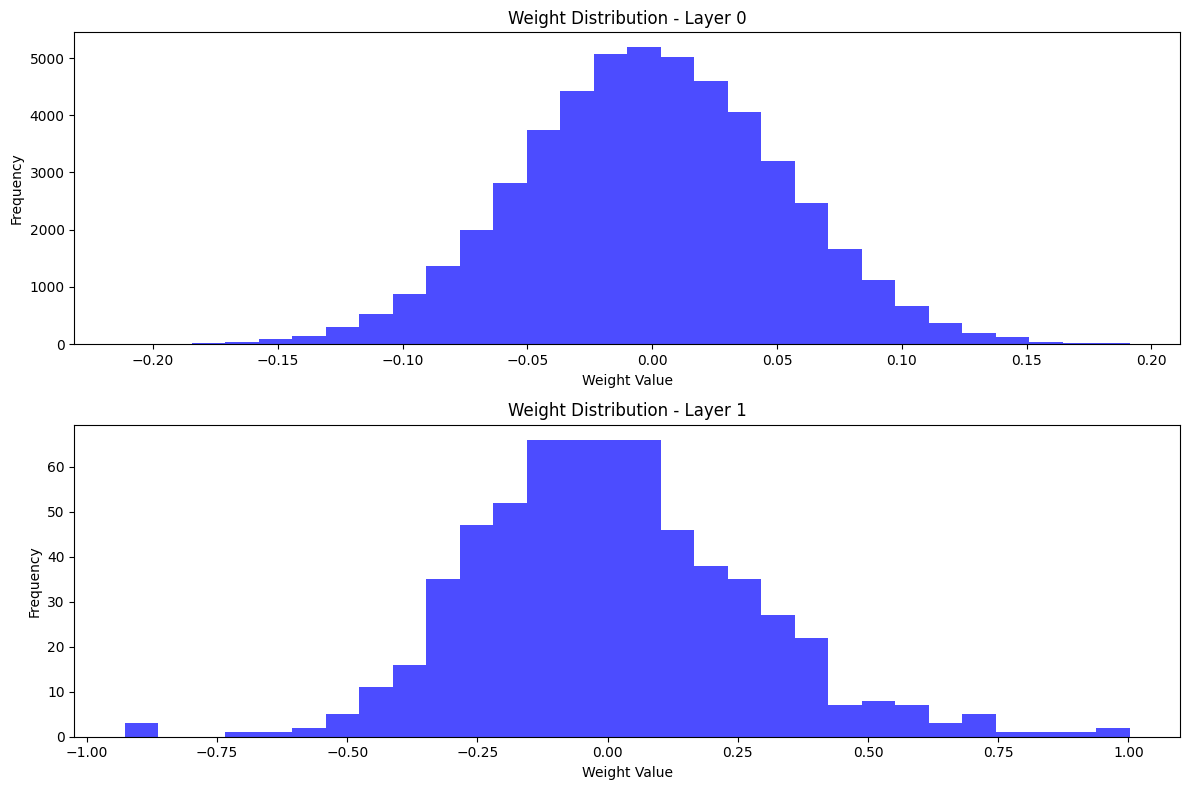

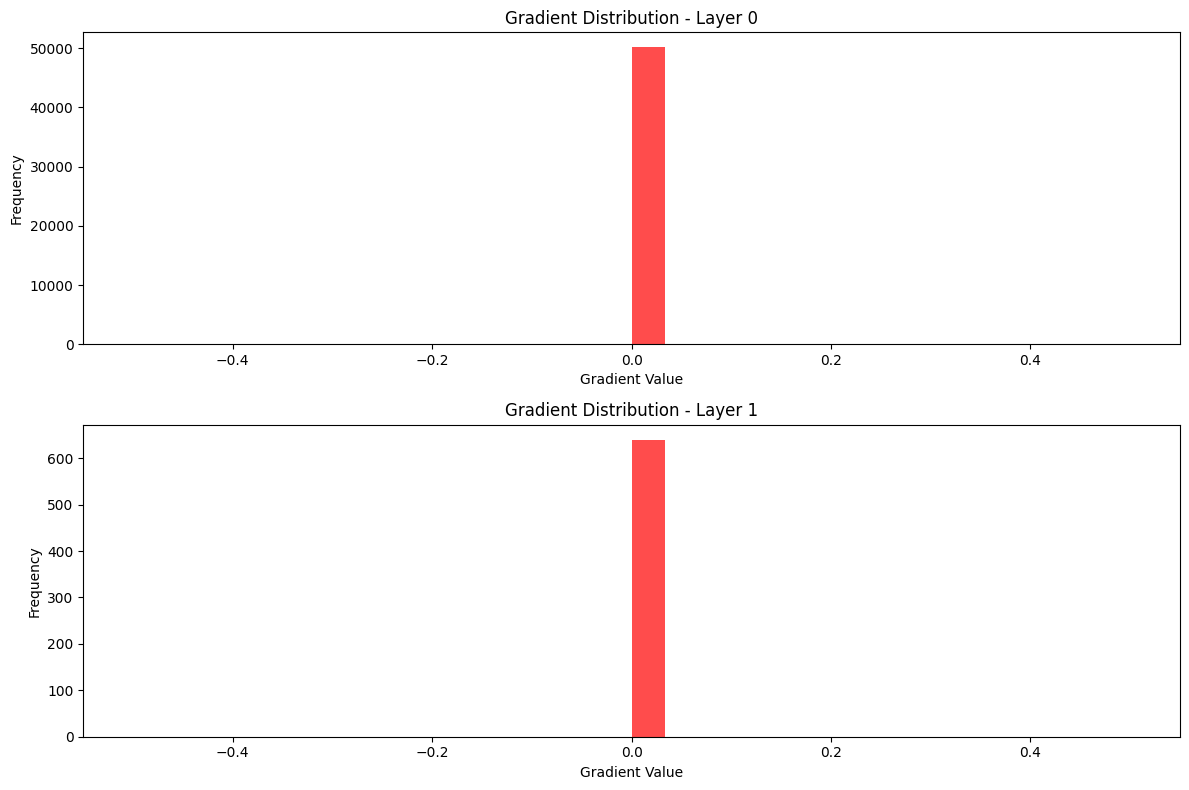

In [3]:
# ReLU
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["relu", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["he", "xavier"], weight_init_params=[{"seed" : 66}, {"seed" : 66}])
ann.train(X_train, y_train, batch_size=8, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Fungsi Aktivasi ReLU")
print(f"Validation Loss akhir perlatihan : {ann.history['val_loss'][-1]}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

Training Progress:   5%|▌         | 1/20 [00:00<00:16,  1.13it/s]

Epoch 0/20 - Train Loss: 16.4060 - Val Loss: 14.16381651526672


Training Progress:  15%|█▌        | 3/20 [00:02<00:14,  1.13it/s]

Epoch 2/20 - Train Loss: 10.1999 - Val Loss: 9.447251155531818


Training Progress:  25%|██▌       | 5/20 [00:05<00:17,  1.18s/it]

Epoch 4/20 - Train Loss: 7.8708 - Val Loss: 7.570072026121305


Training Progress:  35%|███▌      | 7/20 [00:07<00:13,  1.06s/it]

Epoch 6/20 - Train Loss: 6.6722 - Val Loss: 6.540331579724789


Training Progress:  45%|████▌     | 9/20 [00:08<00:10,  1.05it/s]

Epoch 8/20 - Train Loss: 5.9136 - Val Loss: 5.917066289622501


Training Progress:  55%|█████▌    | 11/20 [00:10<00:08,  1.11it/s]

Epoch 10/20 - Train Loss: 5.3983 - Val Loss: 5.442401113060368


Training Progress:  65%|██████▌   | 13/20 [00:12<00:06,  1.15it/s]

Epoch 12/20 - Train Loss: 5.0021 - Val Loss: 5.13403749132812


Training Progress:  75%|███████▌  | 15/20 [00:14<00:04,  1.15it/s]

Epoch 14/20 - Train Loss: 4.6969 - Val Loss: 4.906164791530375


Training Progress:  85%|████████▌ | 17/20 [00:16<00:02,  1.09it/s]

Epoch 16/20 - Train Loss: 4.4786 - Val Loss: 4.681693064592469


Training Progress:  95%|█████████▌| 19/20 [00:18<00:01,  1.13s/it]

Epoch 18/20 - Train Loss: 4.2782 - Val Loss: 4.516804489989828


Training Progress: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


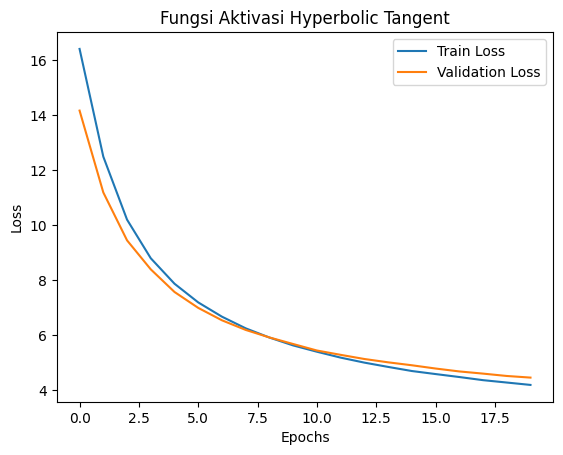

Validation Loss akhir perlatihan : 4.457603233791455


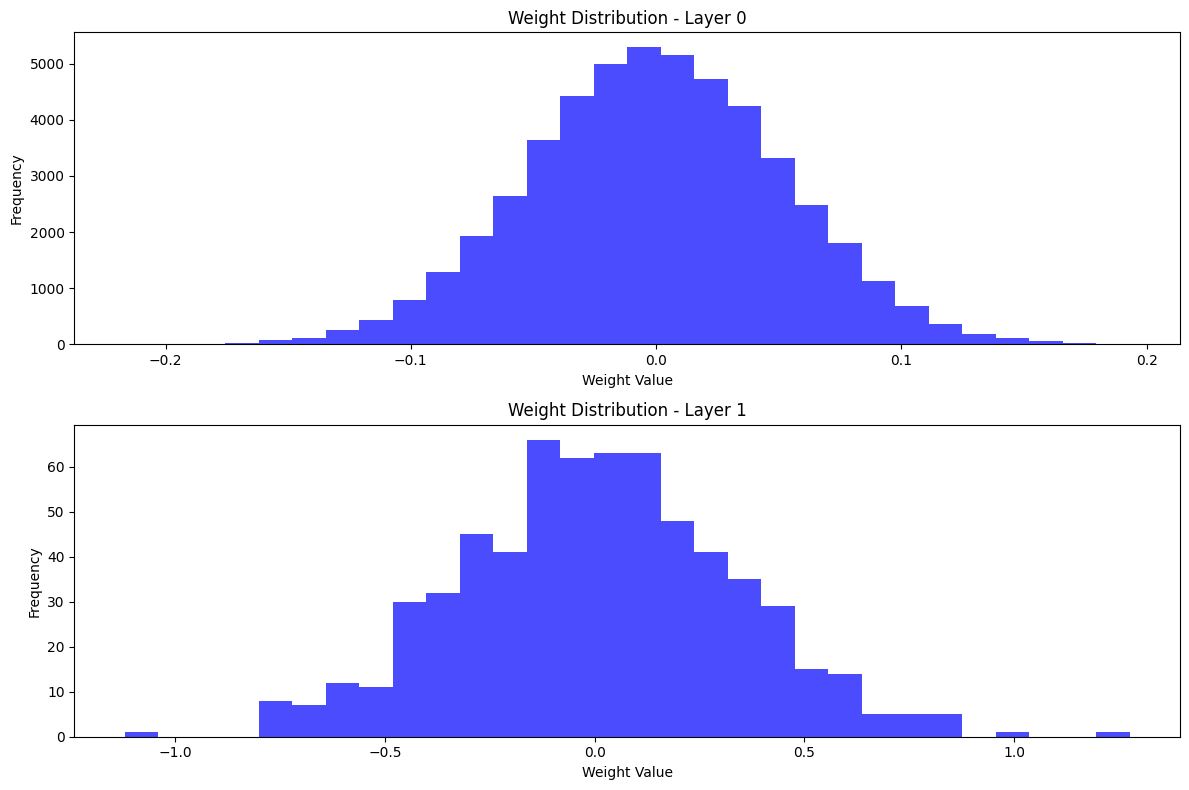

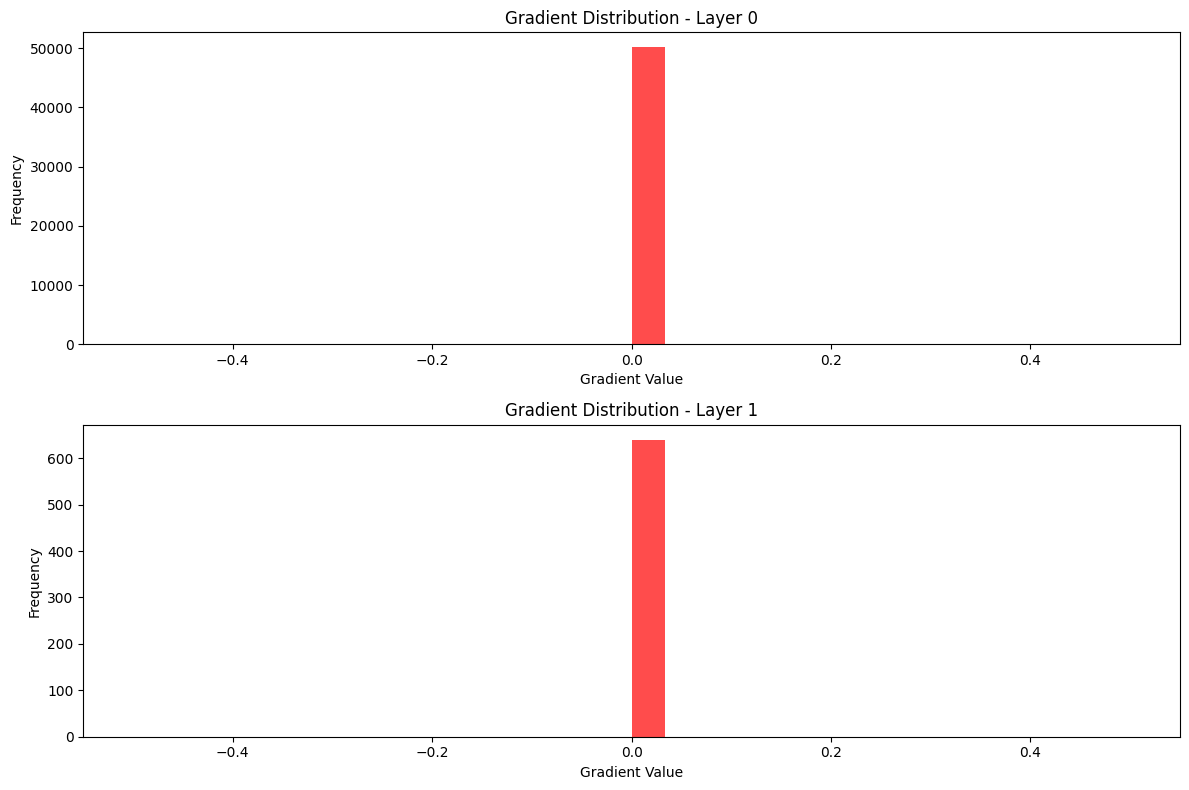

In [ ]:
# Hyperbolic Tangent
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["hyperbolic_tangent", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["he", "xavier"], weight_init_params=[{"seed" : 66}, {"seed" : 66}])
ann.train(X_train, y_train, batch_size=8, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Fungsi Aktivasi Hyperbolic Tangent")
print(f"Validation Loss akhir perlatihan : {ann.history['val_loss'][-1]}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

Training Progress:   5%|▌         | 1/20 [00:03<01:13,  3.89s/it]

Epoch 0/20 - Train Loss: 18.1958 - Val Loss: 17.66608503301089


Training Progress:  15%|█▌        | 3/20 [00:08<00:42,  2.52s/it]

Epoch 2/20 - Train Loss: 15.4615 - Val Loss: 14.654610818727777


Training Progress:  25%|██▌       | 5/20 [00:11<00:31,  2.12s/it]

Epoch 4/20 - Train Loss: 12.2408 - Val Loss: 11.656304294155447


Training Progress:  35%|███▌      | 7/20 [00:15<00:25,  1.93s/it]

Epoch 6/20 - Train Loss: 9.9397 - Val Loss: 9.57374552478095


Training Progress:  45%|████▌     | 9/20 [00:17<00:15,  1.39s/it]

Epoch 8/20 - Train Loss: 8.4333 - Val Loss: 8.280938384116496


Training Progress:  55%|█████▌    | 11/20 [00:19<00:10,  1.15s/it]

Epoch 10/20 - Train Loss: 7.4001 - Val Loss: 7.282021236415434


Training Progress:  65%|██████▌   | 13/20 [00:21<00:07,  1.07s/it]

Epoch 12/20 - Train Loss: 6.6370 - Val Loss: 6.612214733445982


Training Progress:  75%|███████▌  | 15/20 [00:23<00:05,  1.02s/it]

Epoch 14/20 - Train Loss: 6.0677 - Val Loss: 6.116197573938013


Training Progress:  85%|████████▌ | 17/20 [00:30<00:06,  2.28s/it]

Epoch 16/20 - Train Loss: 5.6321 - Val Loss: 5.686603650865423


Training Progress:  95%|█████████▌| 19/20 [00:35<00:02,  2.52s/it]

Epoch 18/20 - Train Loss: 5.2765 - Val Loss: 5.381428798773352


Training Progress: 100%|██████████| 20/20 [00:38<00:00,  1.91s/it]


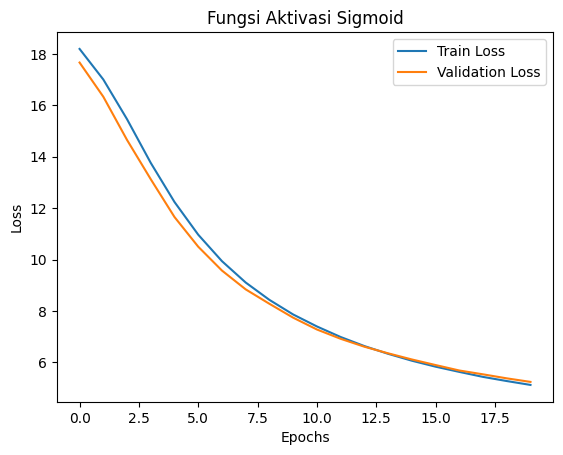

Validation Loss akhir perlatihan : 5.2430470859555225


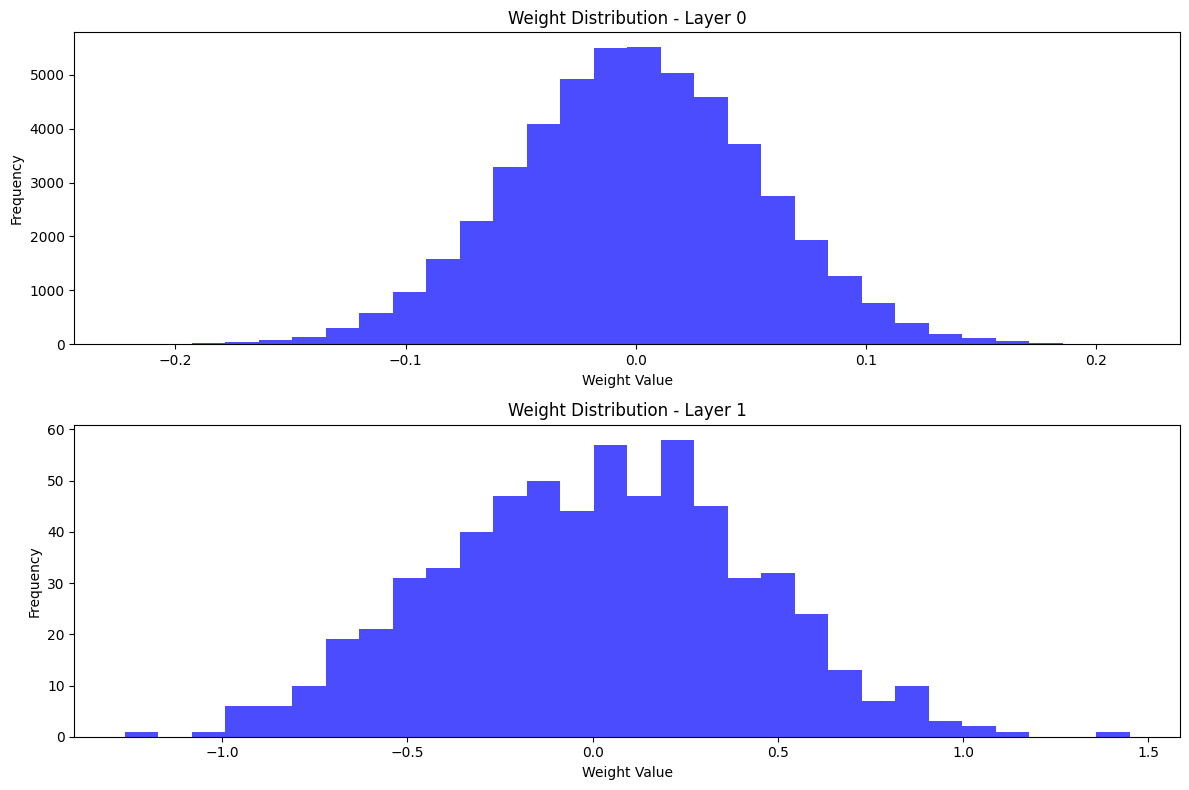

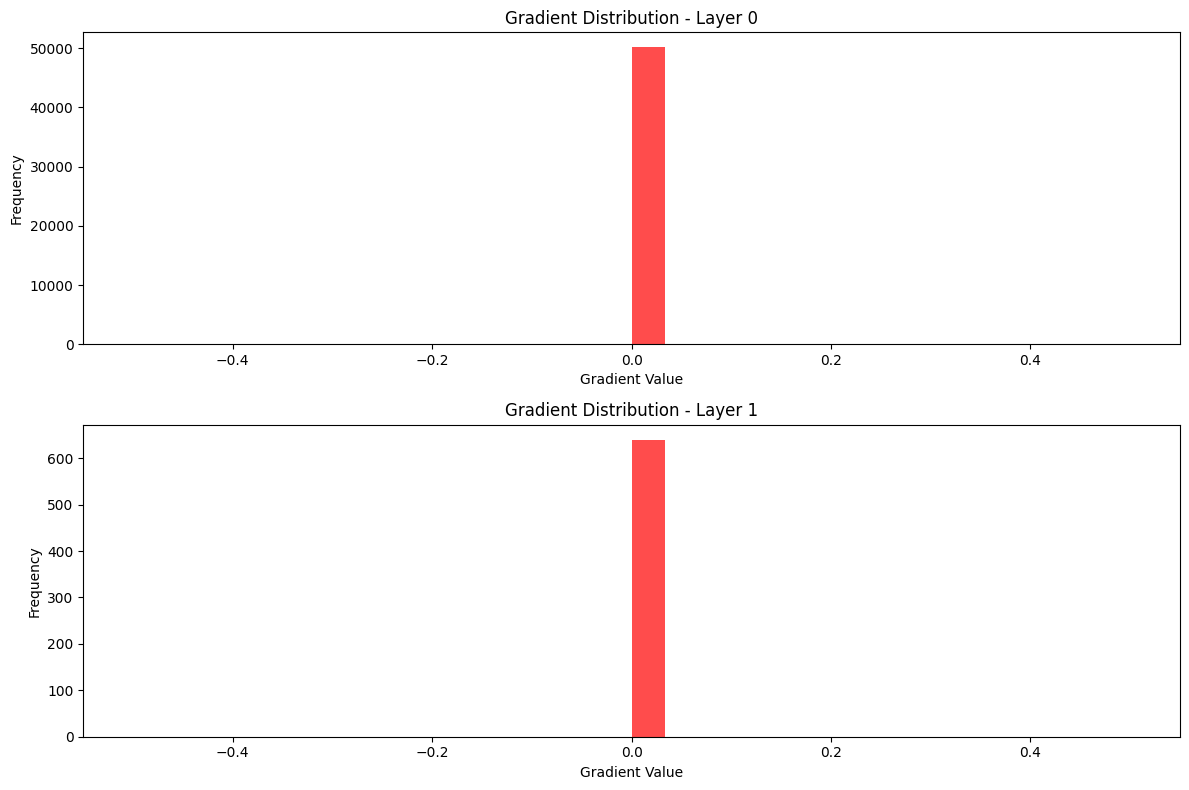

In [ ]:
# Sigmoid
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["sigmoid", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["he", "xavier"], weight_init_params=[{"seed" : 66}, {"seed" : 66}])
ann.train(X_train, y_train, batch_size=8, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Fungsi Aktivasi Sigmoid")
print(f"Validation Loss akhir perlatihan : {ann.history['val_loss'][-1]}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

Training Progress:   5%|▌         | 1/20 [00:02<00:40,  2.11s/it]

Epoch 0/20 - Train Loss: 12.7120 - Val Loss: 9.474481509187003


Training Progress:  15%|█▌        | 3/20 [00:04<00:24,  1.42s/it]

Epoch 2/20 - Train Loss: 7.0005 - Val Loss: 6.680118151646955


Training Progress:  25%|██▌       | 5/20 [00:06<00:15,  1.05s/it]

Epoch 4/20 - Train Loss: 5.7355 - Val Loss: 5.822137020546301


Training Progress:  35%|███▌      | 7/20 [00:07<00:11,  1.09it/s]

Epoch 6/20 - Train Loss: 5.0330 - Val Loss: 5.205267392794291


Training Progress:  45%|████▌     | 9/20 [00:09<00:09,  1.15it/s]

Epoch 8/20 - Train Loss: 4.5863 - Val Loss: 4.830311725773359


Training Progress:  55%|█████▌    | 11/20 [00:11<00:08,  1.11it/s]

Epoch 10/20 - Train Loss: 4.2695 - Val Loss: 4.542946526808712


Training Progress:  65%|██████▌   | 13/20 [00:14<00:07,  1.10s/it]

Epoch 12/20 - Train Loss: 4.0162 - Val Loss: 4.31334251020786


Training Progress:  75%|███████▌  | 15/20 [00:15<00:04,  1.05it/s]

Epoch 14/20 - Train Loss: 3.8075 - Val Loss: 4.255132333713521


Training Progress:  85%|████████▌ | 17/20 [00:17<00:02,  1.14it/s]

Epoch 16/20 - Train Loss: 3.6607 - Val Loss: 4.0482493455218265


Training Progress:  95%|█████████▌| 19/20 [00:18<00:00,  1.20it/s]

Epoch 18/20 - Train Loss: 3.4967 - Val Loss: 3.91021307299484


Training Progress: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


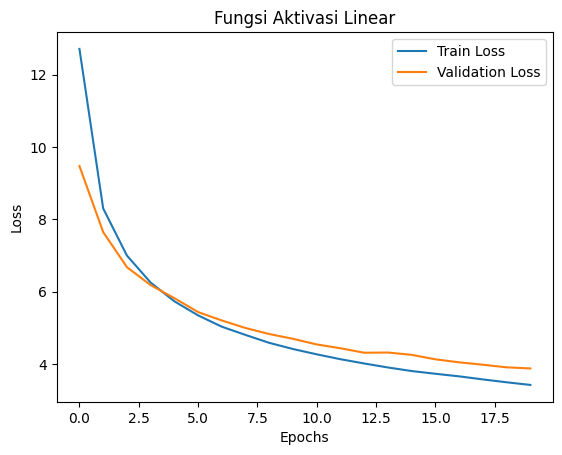

Validation Loss akhir perlatihan : 3.879180060995114


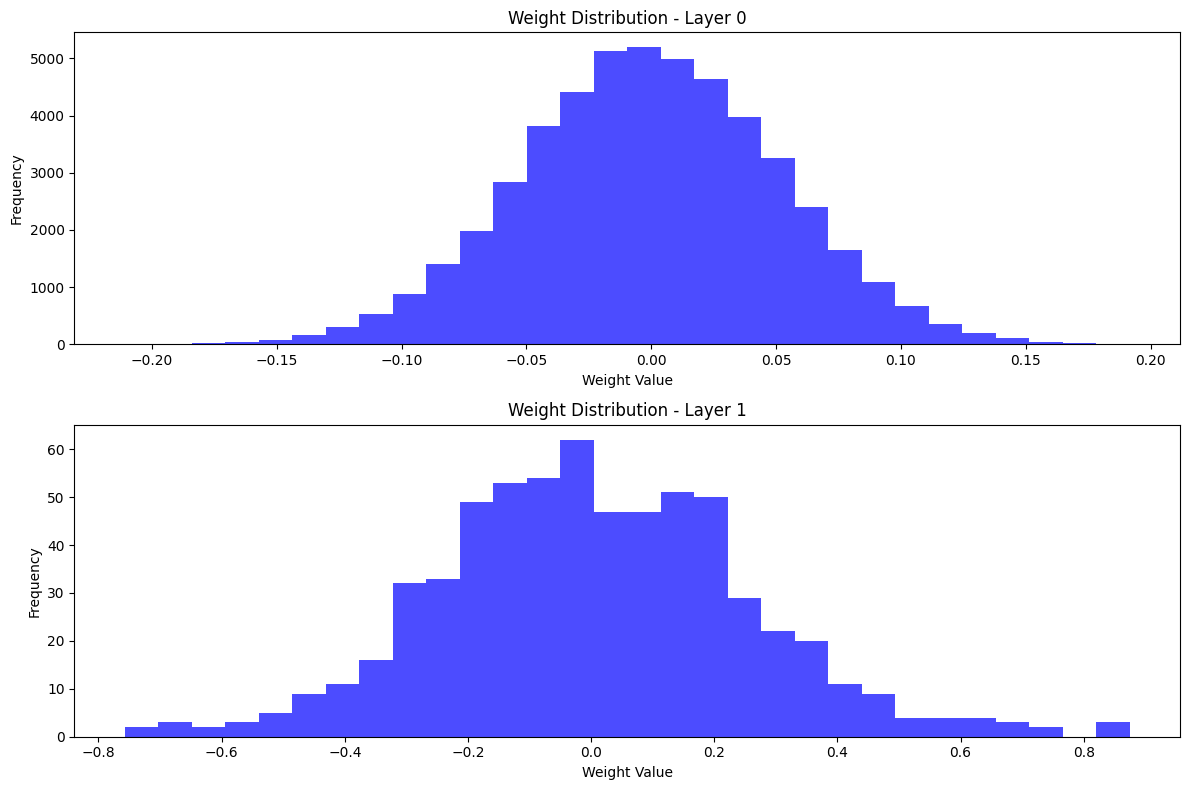

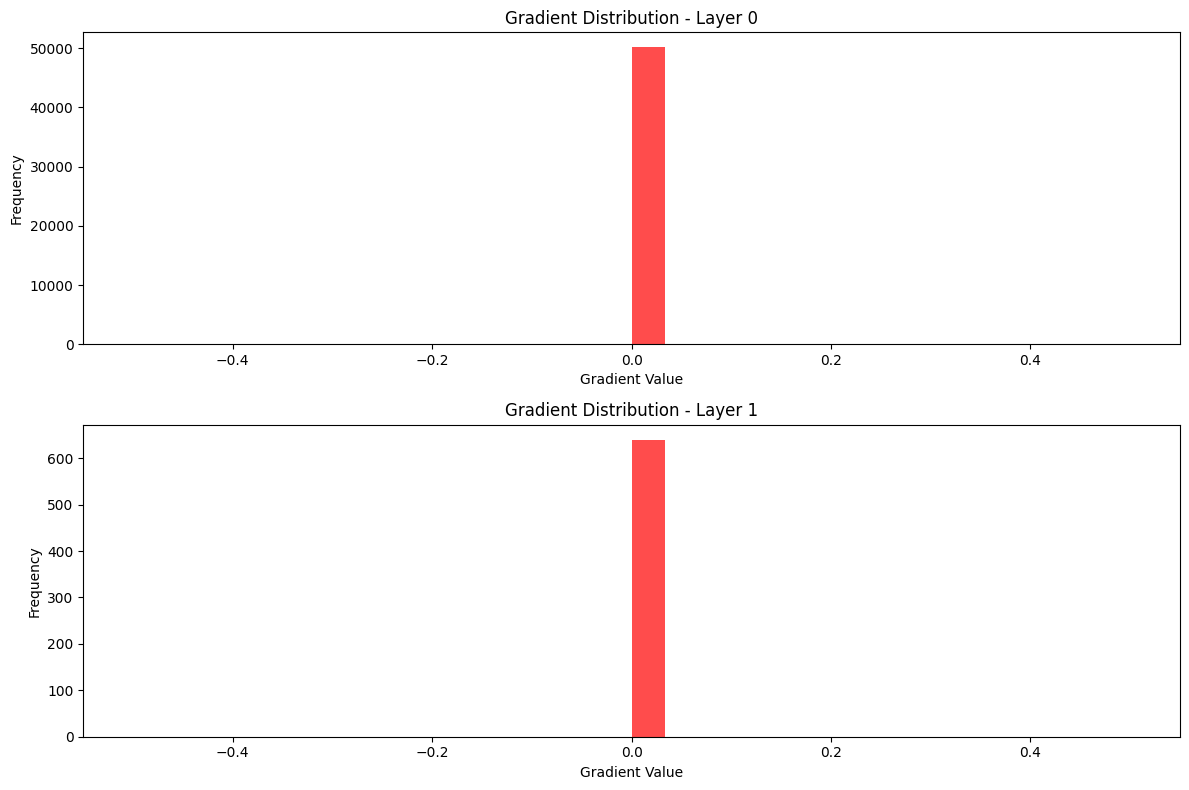

In [ ]:
# Linear
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["linear", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["he", "xavier"], weight_init_params=[{"seed" : 66}, {"seed" : 66}])
ann.train(X_train, y_train, batch_size=8, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Fungsi Aktivasi Linear")
print(f"Validation Loss akhir perlatihan : {ann.history['val_loss'][-1]}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

# Analisis Learning Rate

Training Progress:   5%|▌         | 1/20 [00:01<00:28,  1.49s/it]

Epoch 0/20 - Train Loss: 18.4853 - Val Loss: 18.502596657744416


Training Progress:  15%|█▌        | 3/20 [00:05<00:32,  1.91s/it]

Epoch 2/20 - Train Loss: 18.4533 - Val Loss: 18.44836266424533


Training Progress:  25%|██▌       | 5/20 [00:10<00:31,  2.13s/it]

Epoch 4/20 - Train Loss: 18.3412 - Val Loss: 18.322857838442747


Training Progress:  35%|███▌      | 7/20 [00:13<00:23,  1.78s/it]

Epoch 6/20 - Train Loss: 18.1661 - Val Loss: 18.147595711421665


Training Progress:  45%|████▌     | 9/20 [00:15<00:16,  1.49s/it]

Epoch 8/20 - Train Loss: 17.9841 - Val Loss: 17.95439216413859


Training Progress:  55%|█████▌    | 11/20 [00:17<00:10,  1.15s/it]

Epoch 10/20 - Train Loss: 17.7950 - Val Loss: 17.769404421174002


Training Progress:  65%|██████▌   | 13/20 [00:19<00:07,  1.07s/it]

Epoch 12/20 - Train Loss: 17.6115 - Val Loss: 17.590488242008643


Training Progress:  75%|███████▌  | 15/20 [00:21<00:05,  1.17s/it]

Epoch 14/20 - Train Loss: 17.4320 - Val Loss: 17.418718333241717


Training Progress:  85%|████████▌ | 17/20 [00:23<00:03,  1.00s/it]

Epoch 16/20 - Train Loss: 17.2558 - Val Loss: 17.249084891079285


Training Progress:  95%|█████████▌| 19/20 [00:25<00:00,  1.10it/s]

Epoch 18/20 - Train Loss: 17.0839 - Val Loss: 17.082844523009037


Training Progress: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


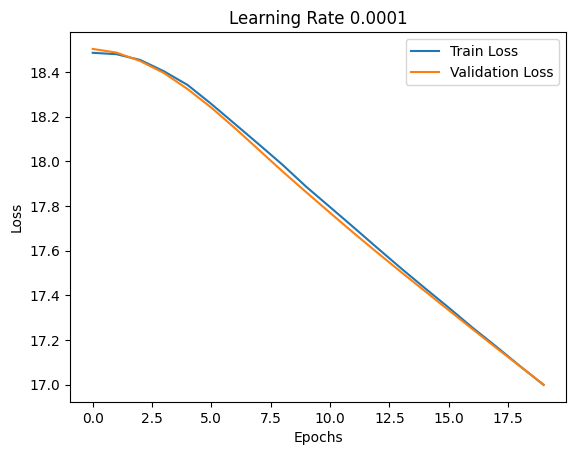

Validation Loss akhir perlatihan : 17.000639716227017


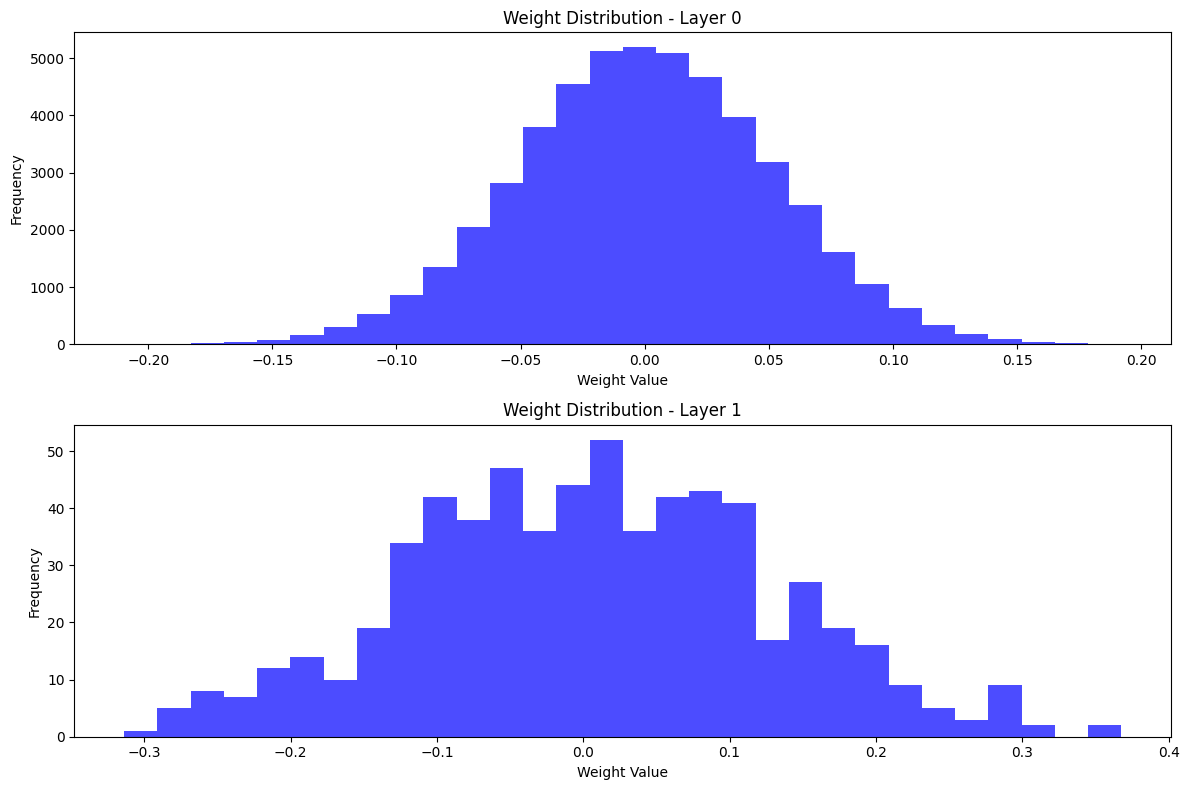

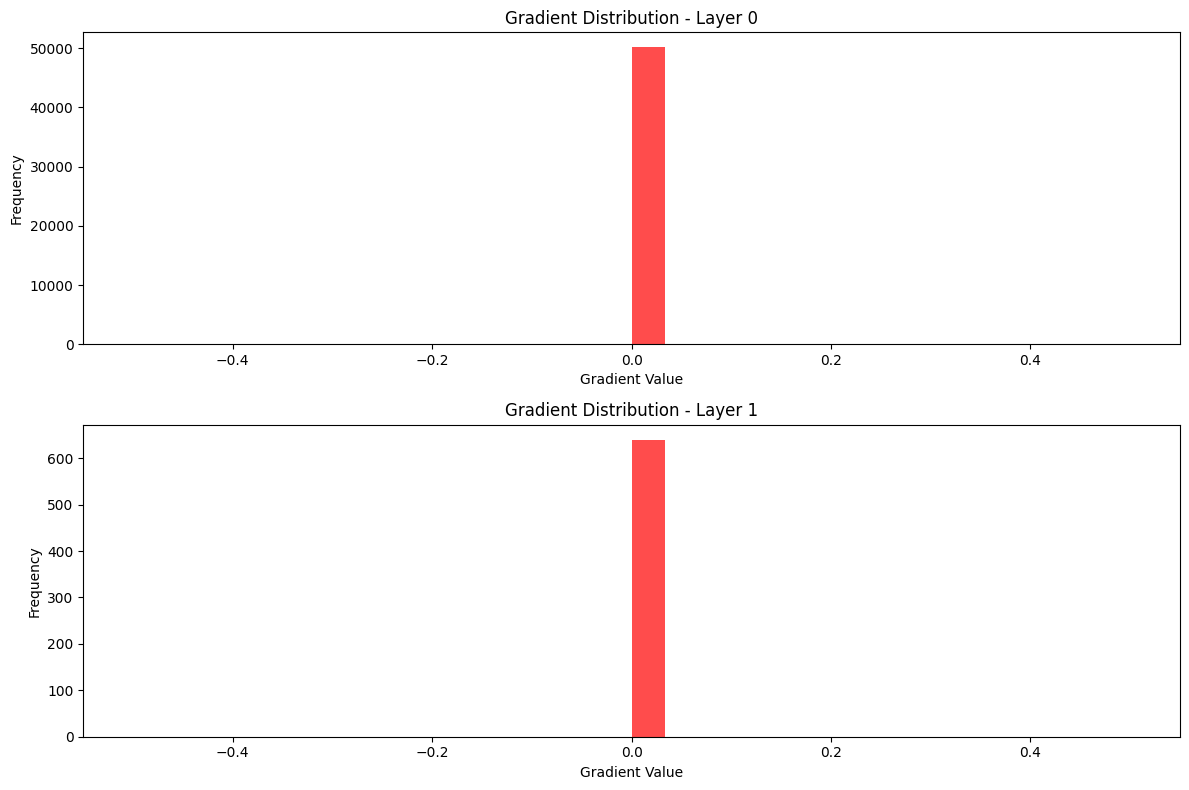

In [ ]:
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["relu", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["he", "xavier"], weight_init_params=[{"seed" : 66}, {"seed" : 66}])
ann.train(X_train, y_train, batch_size=8, learning_rate=0.0001, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Learning Rate 0.0001")
print(f"Validation Loss akhir perlatihan : {ann.history['val_loss'][-1]}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

Training Progress:   5%|▌         | 1/20 [00:00<00:16,  1.15it/s]

Epoch 0/20 - Train Loss: 15.0075 - Val Loss: 12.053889405096669


Training Progress:  15%|█▌        | 3/20 [00:02<00:15,  1.13it/s]

Epoch 2/20 - Train Loss: 8.2950 - Val Loss: 7.765816267531441


Training Progress:  25%|██▌       | 5/20 [00:04<00:12,  1.16it/s]

Epoch 4/20 - Train Loss: 6.3485 - Val Loss: 6.337958810849318


Training Progress:  35%|███▌      | 7/20 [00:07<00:15,  1.15s/it]

Epoch 6/20 - Train Loss: 5.3437 - Val Loss: 5.476920106615701


Training Progress:  45%|████▌     | 9/20 [00:08<00:11,  1.01s/it]

Epoch 8/20 - Train Loss: 4.7318 - Val Loss: 4.982318830444137


Training Progress:  55%|█████▌    | 11/20 [00:10<00:08,  1.08it/s]

Epoch 10/20 - Train Loss: 4.3045 - Val Loss: 4.592975231222505


Training Progress:  65%|██████▌   | 13/20 [00:12<00:06,  1.12it/s]

Epoch 12/20 - Train Loss: 3.9914 - Val Loss: 4.309334664668677


Training Progress:  75%|███████▌  | 15/20 [00:13<00:04,  1.17it/s]

Epoch 14/20 - Train Loss: 3.7404 - Val Loss: 4.1654234688085285


Training Progress:  85%|████████▌ | 17/20 [00:15<00:02,  1.17it/s]

Epoch 16/20 - Train Loss: 3.5566 - Val Loss: 3.9361662511673474


Training Progress:  95%|█████████▌| 19/20 [00:17<00:00,  1.15it/s]

Epoch 18/20 - Train Loss: 3.3716 - Val Loss: 3.7825575790023738


Training Progress: 100%|██████████| 20/20 [00:18<00:00,  1.07it/s]


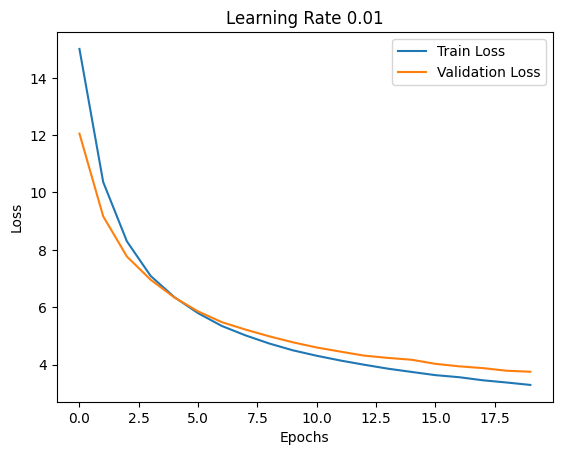

Validation Loss akhir perlatihan : 3.747689388086874


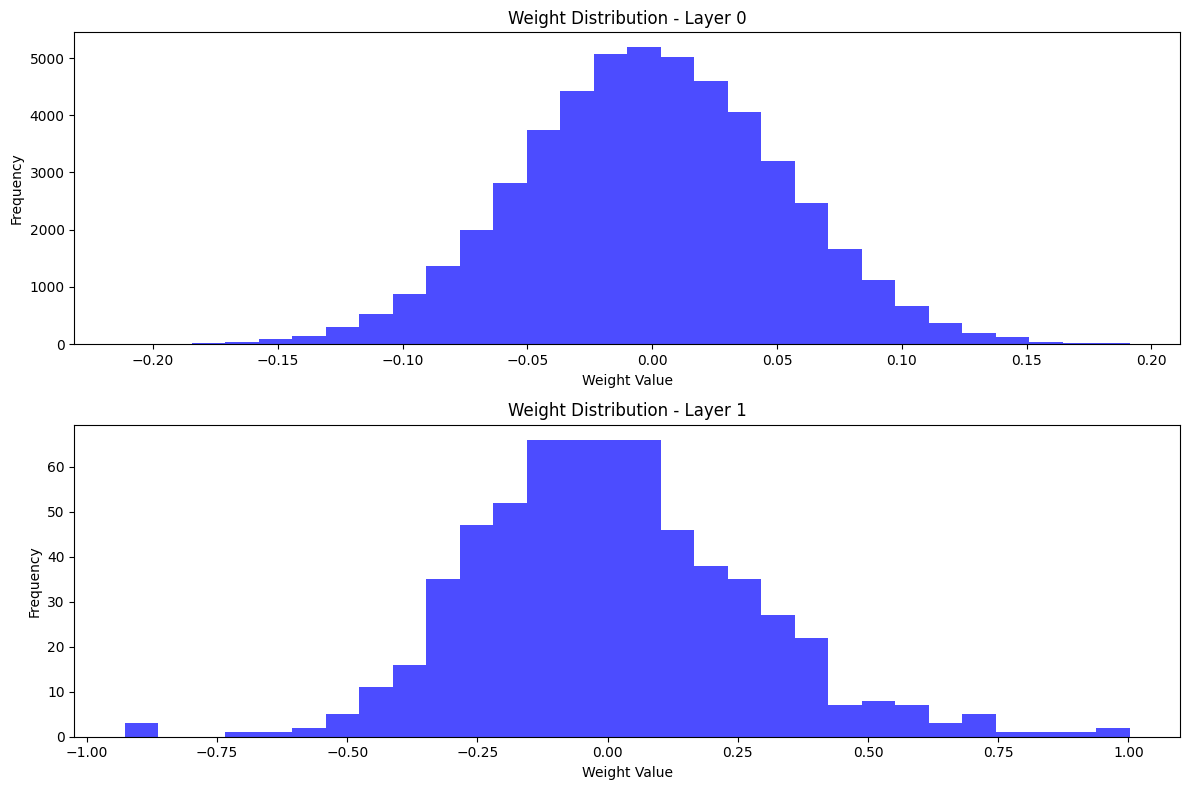

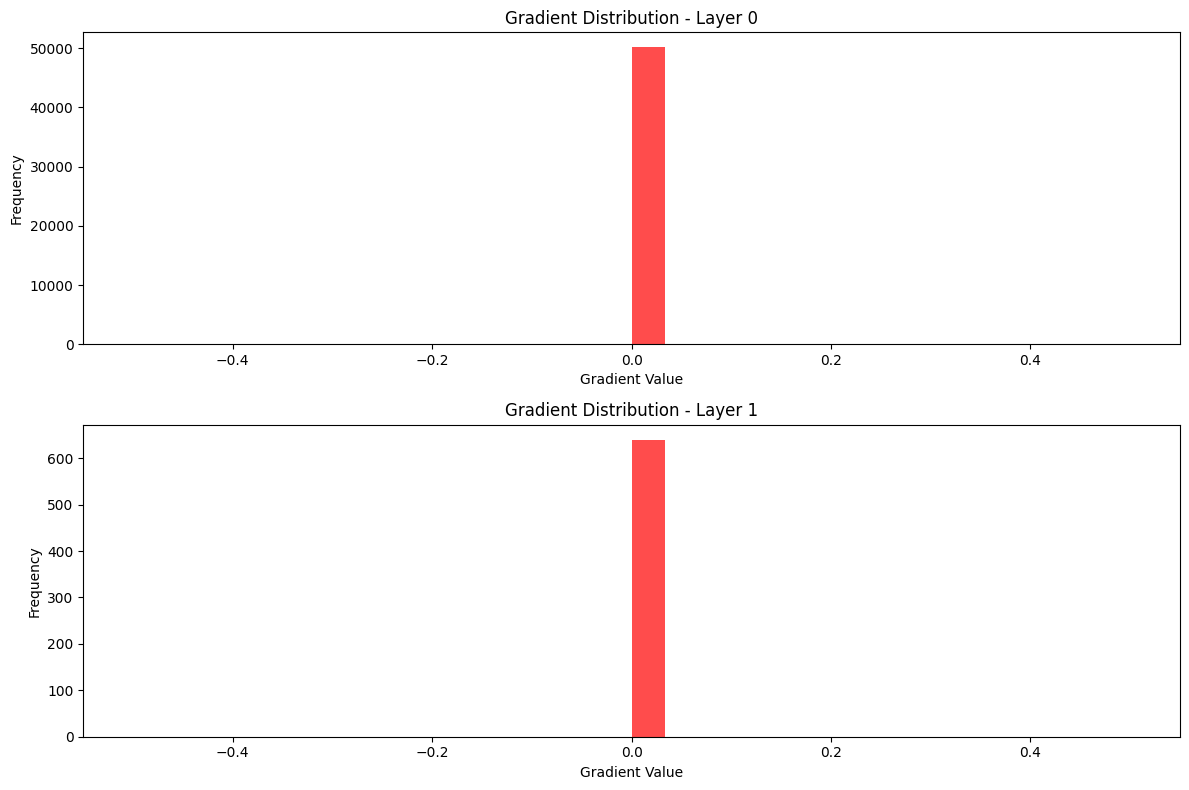

In [ ]:
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["relu", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["he", "xavier"], weight_init_params=[{"seed" : 66}, {"seed" : 66}])
ann.train(X_train, y_train, batch_size=8, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Learning Rate 0.01")
print(f"Validation Loss akhir perlatihan : {ann.history['val_loss'][-1]}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

Training Progress:   5%|▌         | 1/20 [00:00<00:14,  1.33it/s]

Epoch 0/20 - Train Loss: 7.3712 - Val Loss: 9.635087515280794


Training Progress:  15%|█▌        | 3/20 [00:02<00:13,  1.30it/s]

Epoch 2/20 - Train Loss: 3.3450 - Val Loss: 3.1789568303843203


Training Progress:  25%|██▌       | 5/20 [00:03<00:11,  1.35it/s]

Epoch 4/20 - Train Loss: 3.0374 - Val Loss: 5.280806760632692


Training Progress:  35%|███▌      | 7/20 [00:05<00:09,  1.36it/s]

Epoch 6/20 - Train Loss: 2.9616 - Val Loss: 7.275600780393022


Training Progress:  45%|████▌     | 9/20 [00:06<00:08,  1.36it/s]

Epoch 8/20 - Train Loss: 3.4934 - Val Loss: 5.029058703327796


Training Progress:  55%|█████▌    | 11/20 [00:08<00:06,  1.30it/s]

Epoch 10/20 - Train Loss: 4.0898 - Val Loss: 5.059372612743656


Training Progress:  65%|██████▌   | 13/20 [00:10<00:05,  1.20it/s]

Epoch 12/20 - Train Loss: 4.4175 - Val Loss: 3.722736368863917


Training Progress:  75%|███████▌  | 15/20 [00:13<00:06,  1.25s/it]

Epoch 14/20 - Train Loss: 5.0323 - Val Loss: 11.82593505542418


Training Progress:  85%|████████▌ | 17/20 [00:15<00:02,  1.00it/s]

Epoch 16/20 - Train Loss: 4.7490 - Val Loss: 5.3066526761723285


Training Progress:  95%|█████████▌| 19/20 [00:16<00:00,  1.14it/s]

Epoch 18/20 - Train Loss: 5.0412 - Val Loss: 5.09447818423111


Training Progress: 100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


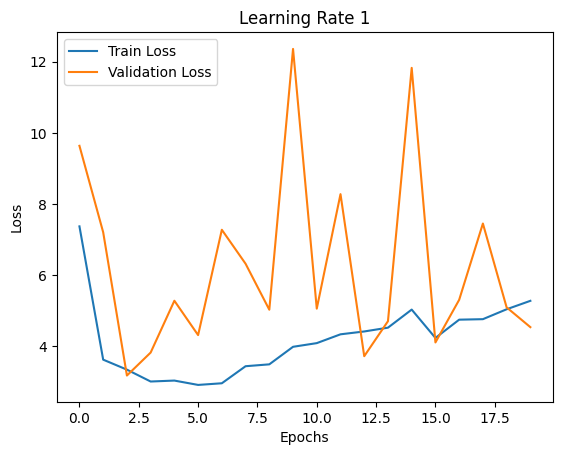

Validation Loss akhir perlatihan : 4.538941418861973


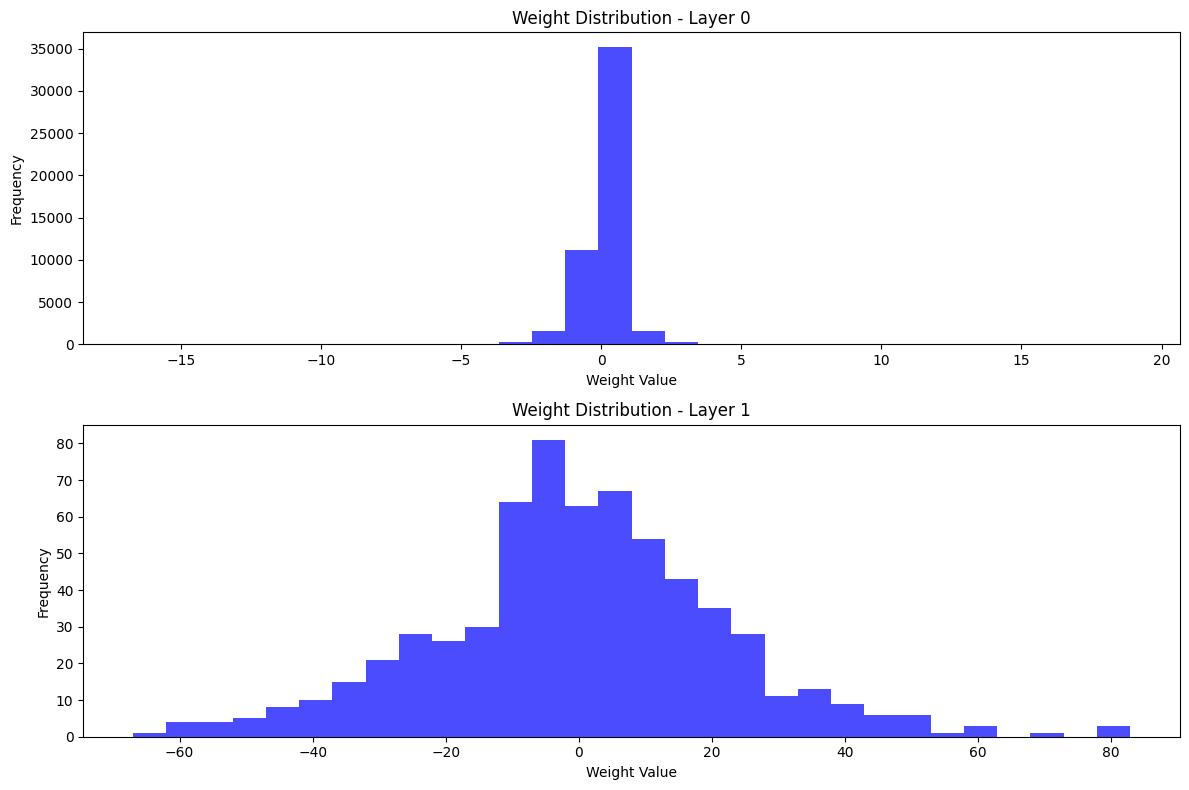

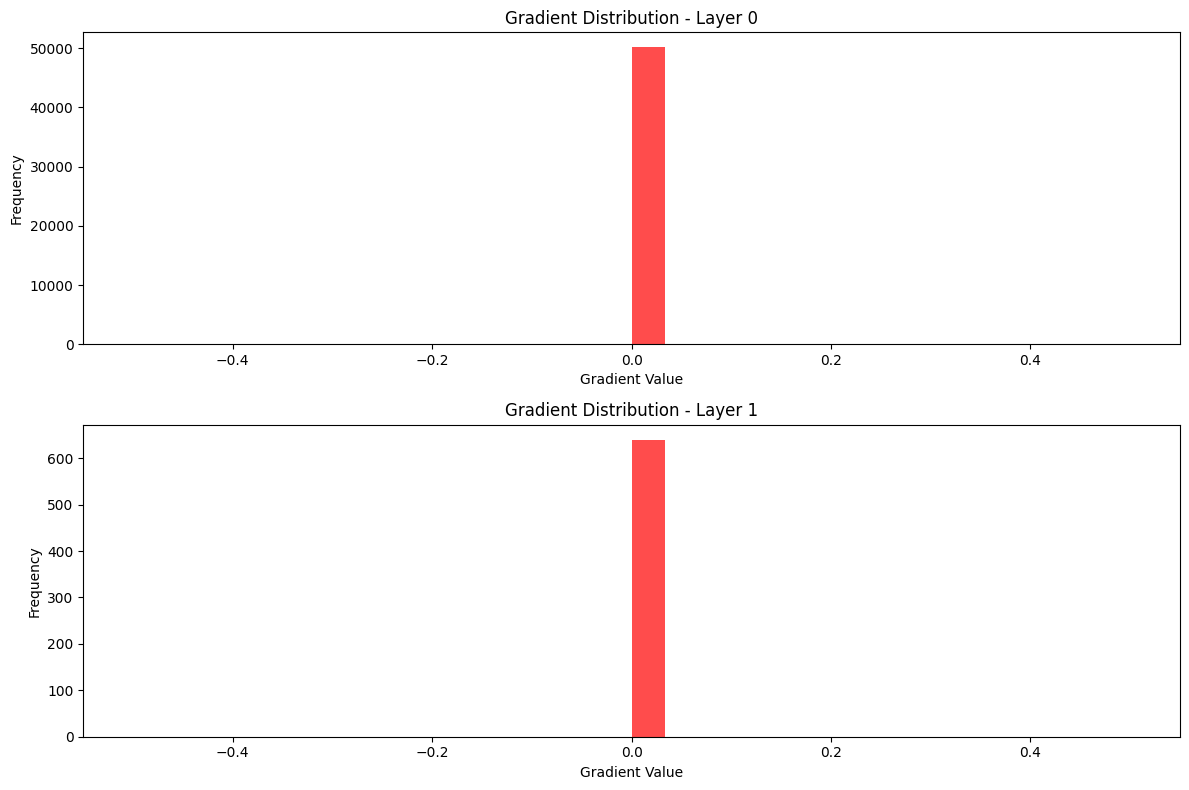

In [ ]:
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["relu", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["he", "xavier"], weight_init_params=[{"seed" : 66}, {"seed" : 66}])
ann.train(X_train, y_train, batch_size=32, learning_rate=1, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Learning Rate 1")
print(f"Validation Loss akhir perlatihan : {ann.history['val_loss'][-1]}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

##PENGARUH DEPTH DAN WIDTH##

Training Progress:   5%|▌         | 1/20 [00:00<00:13,  1.43it/s]

Epoch 0/20 - Train Loss: 18.1763 - Val Loss: 17.447702370366272


Training Progress:  15%|█▌        | 3/20 [00:02<00:11,  1.44it/s]

Epoch 2/20 - Train Loss: 15.2698 - Val Loss: 14.531793723846128


Training Progress:  25%|██▌       | 5/20 [00:03<00:10,  1.50it/s]

Epoch 4/20 - Train Loss: 13.0600 - Val Loss: 12.781682026793353


Training Progress:  35%|███▌      | 7/20 [00:04<00:08,  1.50it/s]

Epoch 6/20 - Train Loss: 11.7126 - Val Loss: 11.353594385598463


Training Progress:  45%|████▌     | 9/20 [00:06<00:07,  1.48it/s]

Epoch 8/20 - Train Loss: 10.7207 - Val Loss: 10.703519925792978


Training Progress:  55%|█████▌    | 11/20 [00:07<00:05,  1.50it/s]

Epoch 10/20 - Train Loss: 9.9339 - Val Loss: 9.787451005130439


Training Progress:  65%|██████▌   | 13/20 [00:10<00:08,  1.15s/it]

Epoch 12/20 - Train Loss: 9.3130 - Val Loss: 9.364637185821817


Training Progress:  75%|███████▌  | 15/20 [00:11<00:04,  1.09it/s]

Epoch 14/20 - Train Loss: 8.8081 - Val Loss: 8.818010181603604


Training Progress:  85%|████████▌ | 17/20 [00:13<00:02,  1.25it/s]

Epoch 16/20 - Train Loss: 8.3676 - Val Loss: 8.53553997825115


Training Progress:  95%|█████████▌| 19/20 [00:14<00:00,  1.38it/s]

Epoch 18/20 - Train Loss: 8.0345 - Val Loss: 8.400132848518252


Training Progress: 100%|██████████| 20/20 [00:15<00:00,  1.32it/s]


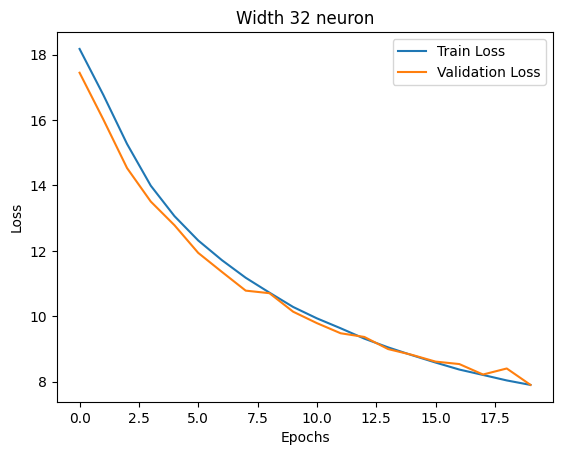

Accuracy: 0.7473


In [ ]:
# Width 32 Neurons
ann = NeuralNetwork(
    input_size=784,
    hidden_layers=[32, 32],
    output_size=10,
    activations=["relu", "relu", "softmax"],
    loss_function="categorical_cross_entropy",
    weight_init_methods=["he", "he", "xavier"],
    weight_init_params=[{"seed":66}, {"seed":66}, {"seed":66}]
)

ann.train(X_train, y_train, batch_size=32, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Width 32 neuron")
predictions = ann.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")

Training Progress:   5%|▌         | 1/20 [00:00<00:16,  1.17it/s]

Epoch 0/20 - Train Loss: 17.8920 - Val Loss: 16.915516974208785


Training Progress:  15%|█▌        | 3/20 [00:02<00:13,  1.23it/s]

Epoch 2/20 - Train Loss: 14.2407 - Val Loss: 13.734110633909385


Training Progress:  25%|██▌       | 5/20 [00:04<00:12,  1.23it/s]

Epoch 4/20 - Train Loss: 11.7384 - Val Loss: 11.516089702326488


Training Progress:  35%|███▌      | 7/20 [00:05<00:10,  1.23it/s]

Epoch 6/20 - Train Loss: 10.1184 - Val Loss: 9.895181514811755


Training Progress:  45%|████▌     | 9/20 [00:07<00:08,  1.25it/s]

Epoch 8/20 - Train Loss: 9.0254 - Val Loss: 8.955197322392785


Training Progress:  55%|█████▌    | 11/20 [00:08<00:07,  1.24it/s]

Epoch 10/20 - Train Loss: 8.2121 - Val Loss: 8.381699661475519


Training Progress:  65%|██████▌   | 13/20 [00:12<00:08,  1.26s/it]

Epoch 12/20 - Train Loss: 7.6478 - Val Loss: 7.84144282593729


Training Progress:  75%|███████▌  | 15/20 [00:14<00:05,  1.14s/it]

Epoch 14/20 - Train Loss: 7.1937 - Val Loss: 7.550172519097891


Training Progress:  85%|████████▌ | 17/20 [00:15<00:02,  1.04it/s]

Epoch 16/20 - Train Loss: 6.8139 - Val Loss: 6.99939217884035


Training Progress:  95%|█████████▌| 19/20 [00:17<00:00,  1.13it/s]

Epoch 18/20 - Train Loss: 6.5096 - Val Loss: 6.781632837279607


Training Progress: 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


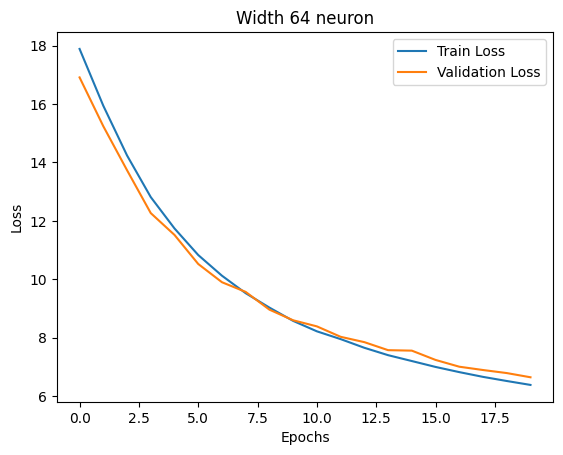

Accuracy: 0.8


In [ ]:
# Width 64 Neurons
ann = NeuralNetwork(
    input_size=784,
    hidden_layers=[64, 64],
    output_size=10,
    activations=["relu", "relu", "softmax"],
    loss_function="categorical_cross_entropy",
    weight_init_methods=["he", "he", "xavier"],
    weight_init_params=[{"seed":66}, {"seed":66}, {"seed":66}]
)

ann.train(X_train, y_train, batch_size=32, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Width 64 neuron")
predictions = ann.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")

Training Progress:   5%|▌         | 1/20 [00:01<00:21,  1.13s/it]

Epoch 0/20 - Train Loss: 16.4359 - Val Loss: 14.634393822266436


Training Progress:  15%|█▌        | 3/20 [00:05<00:31,  1.88s/it]

Epoch 2/20 - Train Loss: 11.7812 - Val Loss: 11.506061190754691


Training Progress:  25%|██▌       | 5/20 [00:07<00:21,  1.43s/it]

Epoch 4/20 - Train Loss: 9.8808 - Val Loss: 10.111417808997983


Training Progress:  35%|███▌      | 7/20 [00:09<00:17,  1.31s/it]

Epoch 6/20 - Train Loss: 8.8075 - Val Loss: 8.94528557154443


Training Progress:  45%|████▌     | 9/20 [00:12<00:13,  1.27s/it]

Epoch 8/20 - Train Loss: 8.0350 - Val Loss: 8.277217953314883


Training Progress:  55%|█████▌    | 11/20 [00:14<00:11,  1.25s/it]

Epoch 10/20 - Train Loss: 7.4222 - Val Loss: 7.582016284337483


Training Progress:  65%|██████▌   | 13/20 [00:19<00:11,  1.62s/it]

Epoch 12/20 - Train Loss: 7.0116 - Val Loss: 7.447408431306801


Training Progress:  75%|███████▌  | 15/20 [00:21<00:06,  1.38s/it]

Epoch 14/20 - Train Loss: 6.6452 - Val Loss: 6.96160415921055


Training Progress:  85%|████████▌ | 17/20 [00:23<00:03,  1.27s/it]

Epoch 16/20 - Train Loss: 6.3282 - Val Loss: 6.763997917179574


Training Progress:  95%|█████████▌| 19/20 [00:25<00:01,  1.21s/it]

Epoch 18/20 - Train Loss: 6.0529 - Val Loss: 6.932588250651848


Training Progress: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


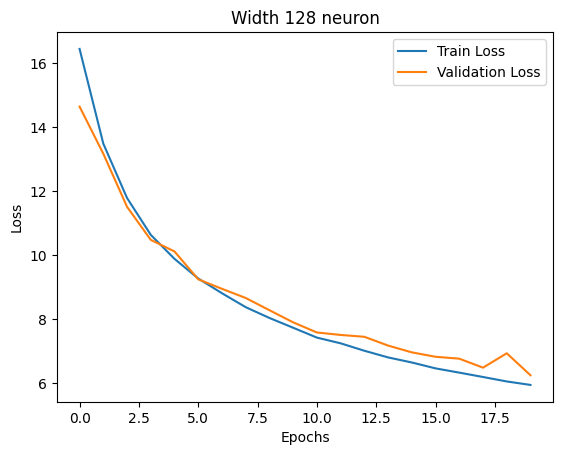

Accuracy: 0.8079


In [ ]:
# Width 128 Neurons
ann = NeuralNetwork(
    input_size=784,
    hidden_layers=[128, 128],
    output_size=10,
    activations=["relu", "relu", "softmax"],
    loss_function="categorical_cross_entropy",
    weight_init_methods=["he", "he", "xavier"],
    weight_init_params=[{"seed":66}, {"seed":66}, {"seed":66}]
)

ann.train(X_train, y_train, batch_size=32, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Width 128 neuron")
predictions = ann.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")

Training Progress:   5%|▌         | 1/20 [00:01<00:32,  1.70s/it]

Epoch 0/20 - Train Loss: 17.7053 - Val Loss: 16.580939824890297


Training Progress:  15%|█▌        | 3/20 [00:03<00:16,  1.06it/s]

Epoch 2/20 - Train Loss: 13.9652 - Val Loss: 13.246575081182218


Training Progress:  25%|██▌       | 5/20 [00:04<00:12,  1.24it/s]

Epoch 4/20 - Train Loss: 11.4986 - Val Loss: 11.116461207954059


Training Progress:  35%|███▌      | 7/20 [00:06<00:10,  1.29it/s]

Epoch 6/20 - Train Loss: 9.9438 - Val Loss: 9.674718562509037


Training Progress:  45%|████▌     | 9/20 [00:07<00:08,  1.31it/s]

Epoch 8/20 - Train Loss: 8.8418 - Val Loss: 8.821980783446834


Training Progress:  55%|█████▌    | 11/20 [00:09<00:06,  1.33it/s]

Epoch 10/20 - Train Loss: 8.0323 - Val Loss: 8.030639321553792


Training Progress:  65%|██████▌   | 13/20 [00:10<00:05,  1.36it/s]

Epoch 12/20 - Train Loss: 7.4386 - Val Loss: 7.501640383428748


Training Progress:  75%|███████▌  | 15/20 [00:12<00:04,  1.15it/s]

Epoch 14/20 - Train Loss: 6.9573 - Val Loss: 7.111228078276945


Training Progress:  85%|████████▌ | 17/20 [00:15<00:03,  1.04s/it]

Epoch 16/20 - Train Loss: 6.5618 - Val Loss: 6.6992812390613805


Training Progress:  95%|█████████▌| 19/20 [00:16<00:00,  1.14it/s]

Epoch 18/20 - Train Loss: 6.2243 - Val Loss: 6.417836894149732


Training Progress: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


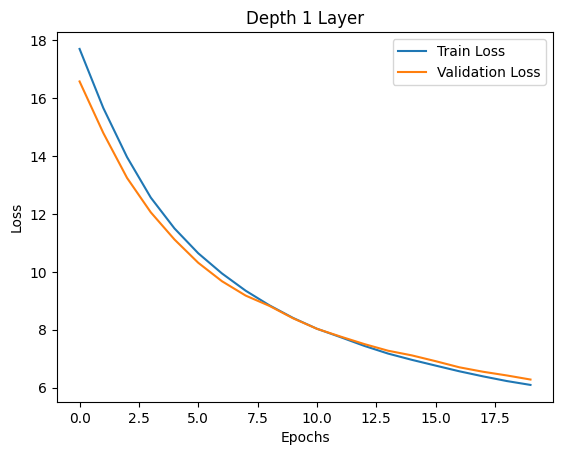

Accuracy: 0.8278


In [ ]:
# Depth 1 Layer
ann = NeuralNetwork(
    input_size=784,
    hidden_layers=[64],
    output_size=10,
    activations=["relu", "softmax"],
    loss_function="categorical_cross_entropy",
    weight_init_methods=["he", "xavier"],
    weight_init_params=[{"seed":66}, {"seed":66}]
)

ann.train(X_train, y_train, batch_size=32, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Depth 1 Layer")
predictions = ann.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")

Training Progress:   5%|▌         | 1/20 [00:00<00:18,  1.01it/s]

Epoch 0/20 - Train Loss: 18.0098 - Val Loss: 16.988321750648304


Training Progress:  15%|█▌        | 3/20 [00:02<00:16,  1.01it/s]

Epoch 2/20 - Train Loss: 14.9764 - Val Loss: 15.166573959529309


Training Progress:  25%|██▌       | 5/20 [00:04<00:14,  1.06it/s]

Epoch 4/20 - Train Loss: 12.7790 - Val Loss: 12.870776487158786


Training Progress:  35%|███▌      | 7/20 [00:06<00:11,  1.11it/s]

Epoch 6/20 - Train Loss: 11.3215 - Val Loss: 11.302770108560049


Training Progress:  45%|████▌     | 9/20 [00:08<00:09,  1.12it/s]

Epoch 8/20 - Train Loss: 10.3221 - Val Loss: 11.35126768147063


Training Progress:  55%|█████▌    | 11/20 [00:10<00:09,  1.06s/it]

Epoch 10/20 - Train Loss: 9.3245 - Val Loss: 9.3613526459356


Training Progress:  65%|██████▌   | 13/20 [00:13<00:08,  1.22s/it]

Epoch 12/20 - Train Loss: 8.7115 - Val Loss: 11.215436326303607


Training Progress:  75%|███████▌  | 15/20 [00:15<00:05,  1.06s/it]

Epoch 14/20 - Train Loss: 8.2778 - Val Loss: 10.250550773941589


Training Progress:  85%|████████▌ | 17/20 [00:17<00:02,  1.01it/s]

Epoch 16/20 - Train Loss: 7.8547 - Val Loss: 7.911017817356171


Training Progress:  95%|█████████▌| 19/20 [00:19<00:00,  1.07it/s]

Epoch 18/20 - Train Loss: 7.5854 - Val Loss: 9.677999547517093


Training Progress: 100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


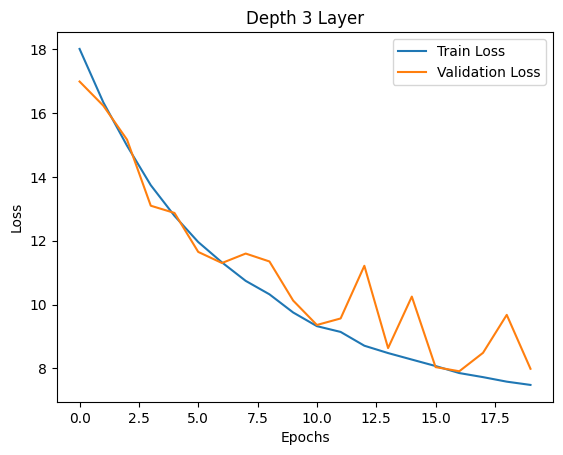

Accuracy: 0.7124


In [ ]:
# Depth 3 Layer
ann = NeuralNetwork(
    input_size=784,
    hidden_layers=[64, 64, 64],
    output_size=10,
    activations=["relu", "relu", "relu", "softmax"],
    loss_function="categorical_cross_entropy",
    weight_init_methods=["he", "he", "he", "xavier"],
    weight_init_params=[{"seed":66}] * 4
)

ann.train(X_train, y_train, batch_size=32, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Depth 3 Layer")
predictions = ann.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")

Training Progress:   5%|▌         | 1/20 [00:01<00:20,  1.07s/it]

Epoch 0/20 - Train Loss: 17.7340 - Val Loss: 16.84283015853331


Training Progress:  15%|█▌        | 3/20 [00:03<00:17,  1.04s/it]

Epoch 2/20 - Train Loss: 14.9366 - Val Loss: 17.342250337712976


Training Progress:  25%|██▌       | 5/20 [00:05<00:15,  1.03s/it]

Epoch 4/20 - Train Loss: 13.3791 - Val Loss: 13.360177061590427


Training Progress:  35%|███▌      | 7/20 [00:07<00:13,  1.08s/it]

Epoch 6/20 - Train Loss: 12.3612 - Val Loss: 14.56193745567749


Training Progress:  45%|████▌     | 9/20 [00:11<00:16,  1.48s/it]

Epoch 8/20 - Train Loss: 11.7172 - Val Loss: 13.304097442464217


Training Progress:  55%|█████▌    | 11/20 [00:13<00:11,  1.25s/it]

Epoch 10/20 - Train Loss: 10.9765 - Val Loss: 11.082262717078505


Training Progress:  65%|██████▌   | 13/20 [00:15<00:08,  1.16s/it]

Epoch 12/20 - Train Loss: 10.6354 - Val Loss: 14.305334211718591


Training Progress:  75%|███████▌  | 15/20 [00:17<00:05,  1.12s/it]

Epoch 14/20 - Train Loss: 10.1842 - Val Loss: 11.856670386158417


Training Progress:  85%|████████▌ | 17/20 [00:19<00:03,  1.07s/it]

Epoch 16/20 - Train Loss: 9.8853 - Val Loss: 9.892795084782977


Training Progress:  95%|█████████▌| 19/20 [00:23<00:01,  1.51s/it]

Epoch 18/20 - Train Loss: 9.6775 - Val Loss: 12.083249452500544


Training Progress: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


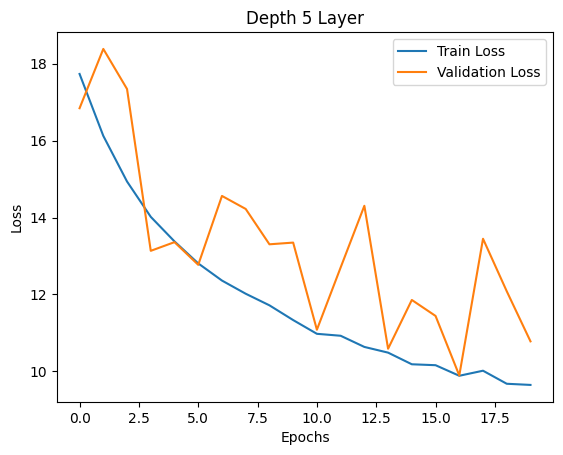

Accuracy: 0.5418


In [ ]:
# Depth 3 Layer
ann = NeuralNetwork(
    input_size=784,
    hidden_layers=[64, 64, 64, 64, 64],
    output_size=10,
    activations=["relu", "relu", "relu", "relu", "relu", "softmax"],
    loss_function="categorical_cross_entropy",
    weight_init_methods=["he", "he", "he", "he", "he", "xavier"],
    weight_init_params=[{"seed":66}] * 6
)

ann.train(X_train, y_train, batch_size=32, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Depth 5 Layer")
predictions = ann.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")

##PENGARUH INSIALISASI BOBOT##

Training Progress:   5%|▌         | 1/20 [00:00<00:13,  1.38it/s]

Epoch 0/20 - Train Loss: 18.7401 - Val Loss: 18.649796971384056


Training Progress:  15%|█▌        | 3/20 [00:02<00:12,  1.34it/s]

Epoch 2/20 - Train Loss: 18.7375 - Val Loss: 18.64840298666657


Training Progress:  25%|██▌       | 5/20 [00:03<00:12,  1.19it/s]

Epoch 4/20 - Train Loss: 18.7361 - Val Loss: 18.647864281409838


Training Progress:  35%|███▌      | 7/20 [00:07<00:15,  1.17s/it]

Epoch 6/20 - Train Loss: 18.7357 - Val Loss: 18.647384199165444


Training Progress:  45%|████▌     | 9/20 [00:08<00:10,  1.05it/s]

Epoch 8/20 - Train Loss: 18.7350 - Val Loss: 18.64726335316473


Training Progress:  55%|█████▌    | 11/20 [00:10<00:07,  1.20it/s]

Epoch 10/20 - Train Loss: 18.7353 - Val Loss: 18.646953831992224


Training Progress:  65%|██████▌   | 13/20 [00:11<00:05,  1.27it/s]

Epoch 12/20 - Train Loss: 18.7350 - Val Loss: 18.647104501672583


Training Progress:  75%|███████▌  | 15/20 [00:13<00:04,  1.20it/s]

Epoch 14/20 - Train Loss: 18.7345 - Val Loss: 18.64693989926329


Training Progress:  85%|████████▌ | 17/20 [00:14<00:02,  1.23it/s]

Epoch 16/20 - Train Loss: 18.7347 - Val Loss: 18.64688299618379


Training Progress:  95%|█████████▌| 19/20 [00:16<00:00,  1.29it/s]

Epoch 18/20 - Train Loss: 18.7345 - Val Loss: 18.646926033683226


Training Progress: 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


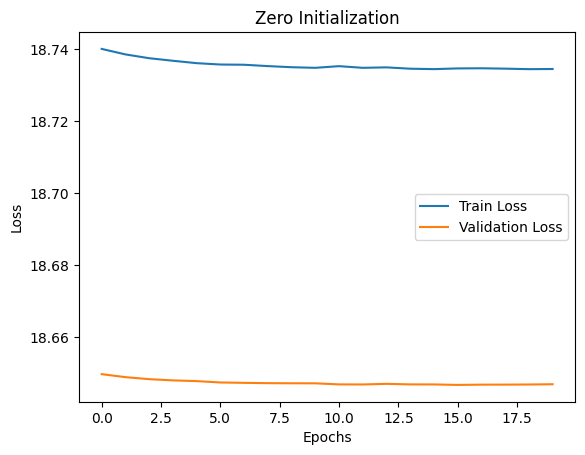

Accuracy: 0.1031


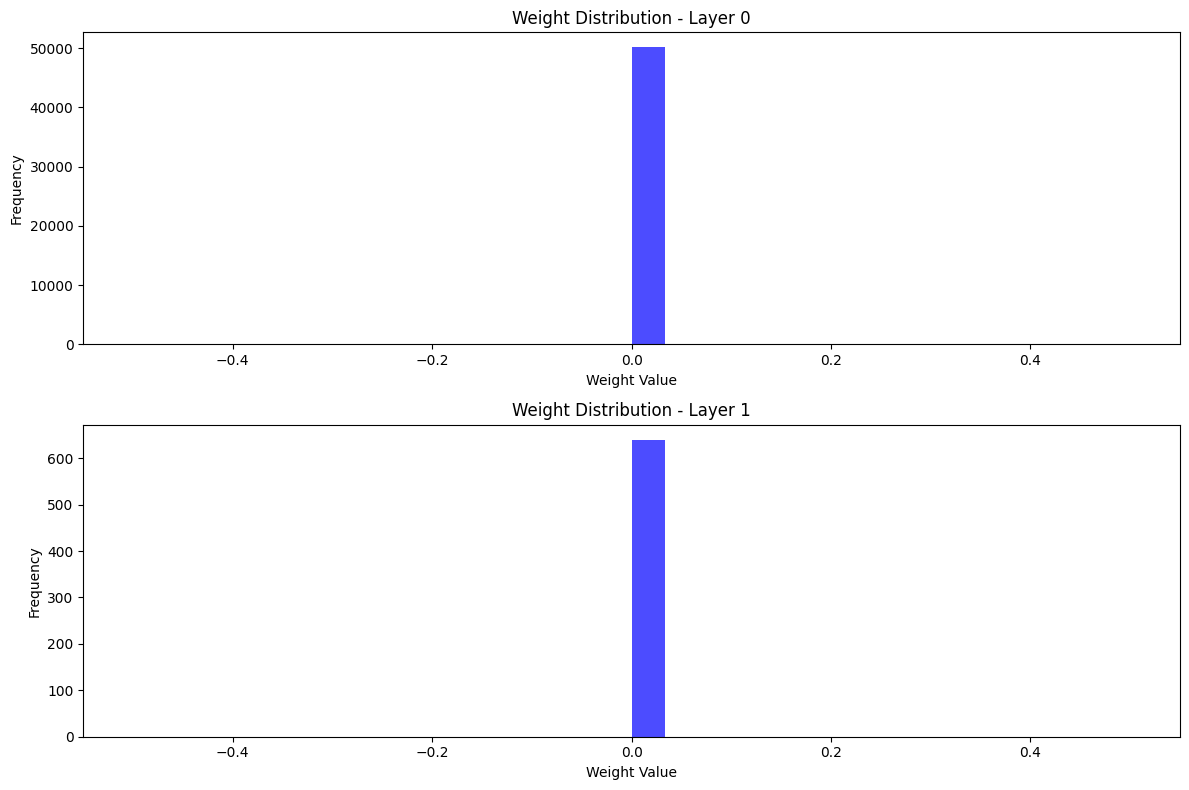

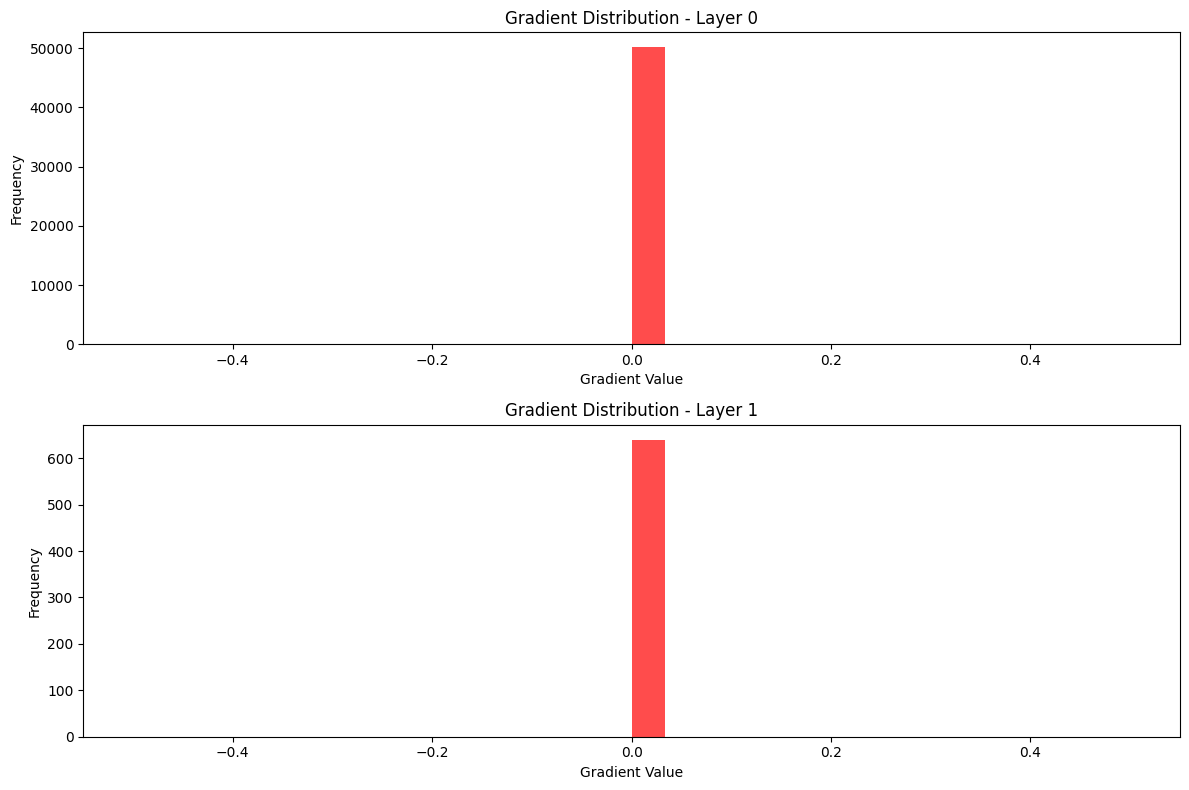

In [ ]:
# Zero Initialization
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["relu", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["zero","zero"], weight_init_params=[{"seed" : 66}, {"seed" : 66}])
ann.train(X_train, y_train, batch_size=32, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Zero Initialization")
predictions = ann.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

Training Progress:   5%|▌         | 1/20 [00:00<00:14,  1.32it/s]

Epoch 0/20 - Train Loss: 14.1846 - Val Loss: 10.41180802808948


Training Progress:  15%|█▌        | 3/20 [00:02<00:12,  1.32it/s]

Epoch 2/20 - Train Loss: 7.2681 - Val Loss: 6.98401181595719


Training Progress:  25%|██▌       | 5/20 [00:04<00:13,  1.15it/s]

Epoch 4/20 - Train Loss: 6.1147 - Val Loss: 6.208285326985013


Training Progress:  35%|███▌      | 7/20 [00:05<00:10,  1.23it/s]

Epoch 6/20 - Train Loss: 5.9346 - Val Loss: 6.582820986067664


Training Progress:  45%|████▌     | 9/20 [00:07<00:08,  1.31it/s]

Epoch 8/20 - Train Loss: 5.9481 - Val Loss: 6.430622180074276


Training Progress:  55%|█████▌    | 11/20 [00:08<00:06,  1.34it/s]

Epoch 10/20 - Train Loss: 5.9663 - Val Loss: 7.35877448066433


Training Progress:  65%|██████▌   | 13/20 [00:10<00:05,  1.26it/s]

Epoch 12/20 - Train Loss: 6.2139 - Val Loss: 6.4324395850142455


Training Progress:  75%|███████▌  | 15/20 [00:13<00:05,  1.16s/it]

Epoch 14/20 - Train Loss: 6.3798 - Val Loss: 9.439441945622553


Training Progress:  85%|████████▌ | 17/20 [00:15<00:02,  1.05it/s]

Epoch 16/20 - Train Loss: 6.4516 - Val Loss: 10.079952171166614


Training Progress:  95%|█████████▌| 19/20 [00:16<00:00,  1.18it/s]

Epoch 18/20 - Train Loss: 6.4982 - Val Loss: 7.537481639761818


Training Progress: 100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


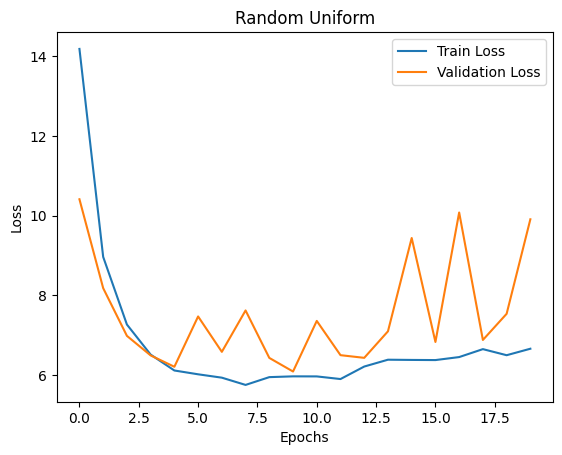

Accuracy: 0.5294


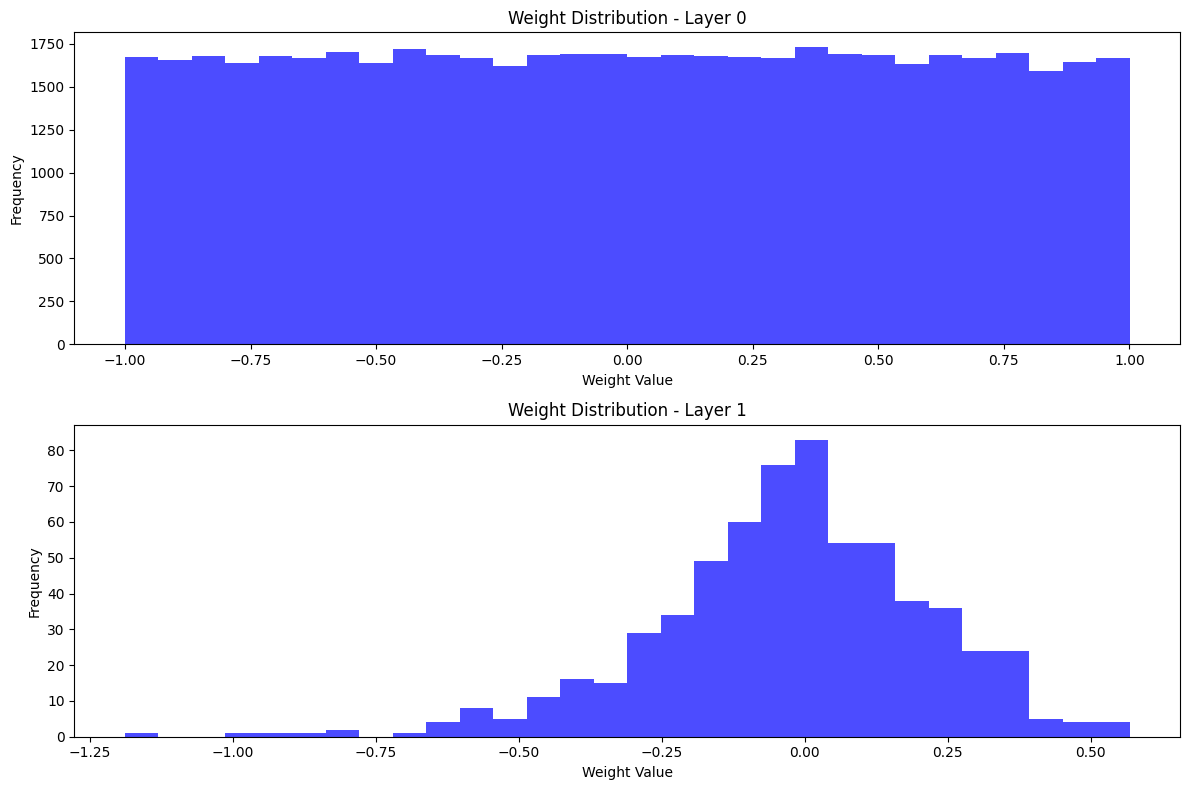

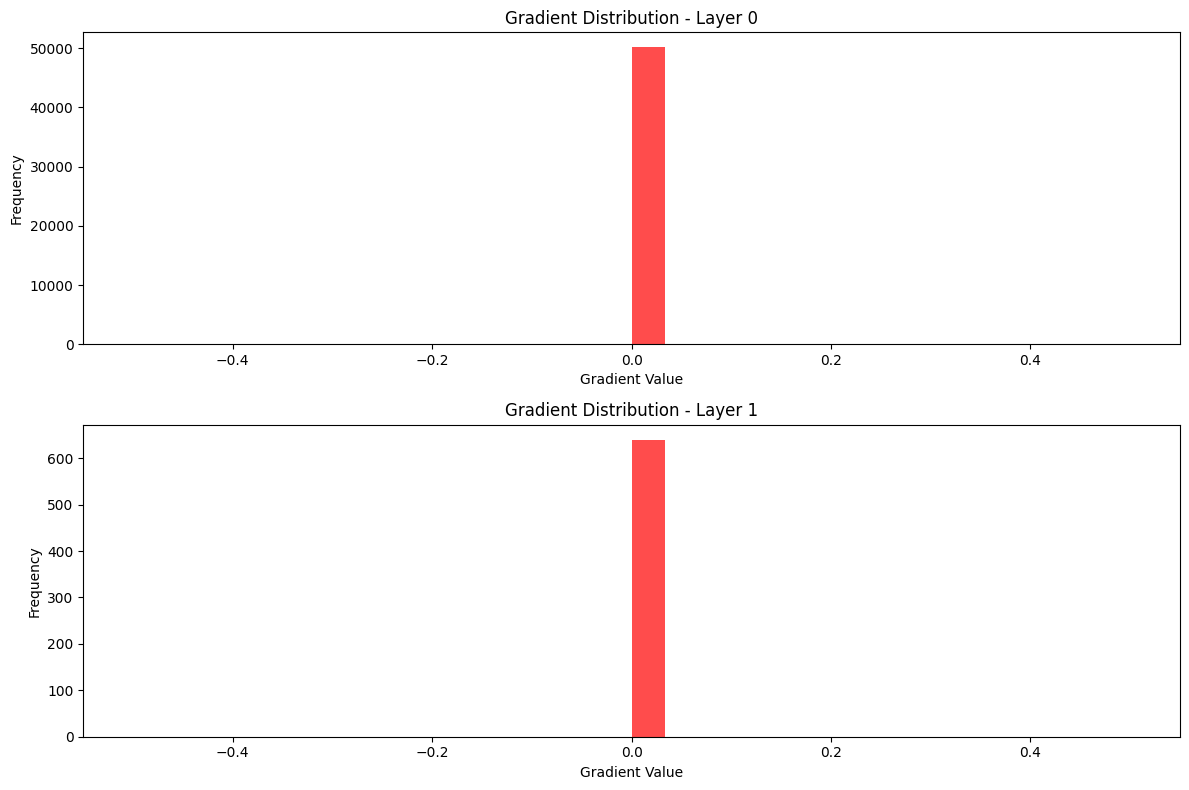

In [ ]:
# Random Uniform
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["relu", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["random_uniform","random_uniform"], weight_init_params=[{"seed" : 66}, {"seed" : 66}])
ann.train(X_train, y_train, batch_size=32, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Random Uniform")
predictions = ann.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

Training Progress:   5%|▌         | 1/20 [00:02<00:39,  2.06s/it]

Epoch 0/20 - Train Loss: 16.8169 - Val Loss: 17.226879622987415


Training Progress:  15%|█▌        | 3/20 [00:03<00:17,  1.01s/it]

Epoch 2/20 - Train Loss: 13.0919 - Val Loss: 13.10585338004056


Training Progress:  25%|██▌       | 5/20 [00:04<00:12,  1.19it/s]

Epoch 4/20 - Train Loss: 11.6804 - Val Loss: 13.83104403271855


Training Progress:  35%|███▌      | 7/20 [00:06<00:10,  1.26it/s]

Epoch 6/20 - Train Loss: 10.8215 - Val Loss: 12.2441522803521


Training Progress:  45%|████▌     | 9/20 [00:07<00:08,  1.31it/s]

Epoch 8/20 - Train Loss: 10.2946 - Val Loss: 11.459573601599699


Training Progress:  55%|█████▌    | 11/20 [00:09<00:07,  1.28it/s]

Epoch 10/20 - Train Loss: 10.0060 - Val Loss: 9.34620047192272


Training Progress:  65%|██████▌   | 13/20 [00:11<00:05,  1.32it/s]

Epoch 12/20 - Train Loss: 9.9642 - Val Loss: 13.138838604603851


Training Progress:  75%|███████▌  | 15/20 [00:13<00:04,  1.10it/s]

Epoch 14/20 - Train Loss: 9.6802 - Val Loss: 11.047312293009478


Training Progress:  85%|████████▌ | 17/20 [00:15<00:03,  1.10s/it]

Epoch 16/20 - Train Loss: 9.3764 - Val Loss: 12.068743050797137


Training Progress:  95%|█████████▌| 19/20 [00:17<00:00,  1.10it/s]

Epoch 18/20 - Train Loss: 9.3433 - Val Loss: 11.067022575171999


Training Progress: 100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


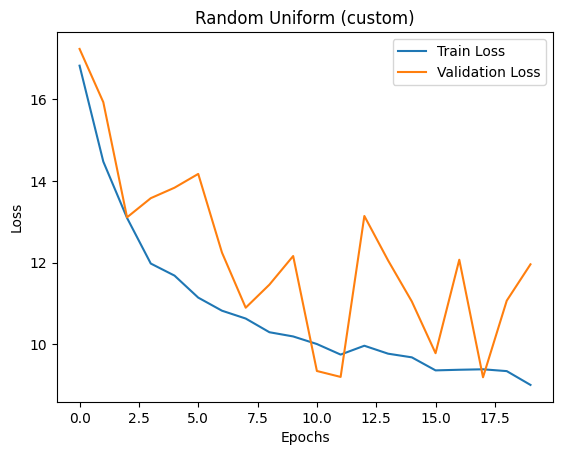

Accuracy: 0.4446


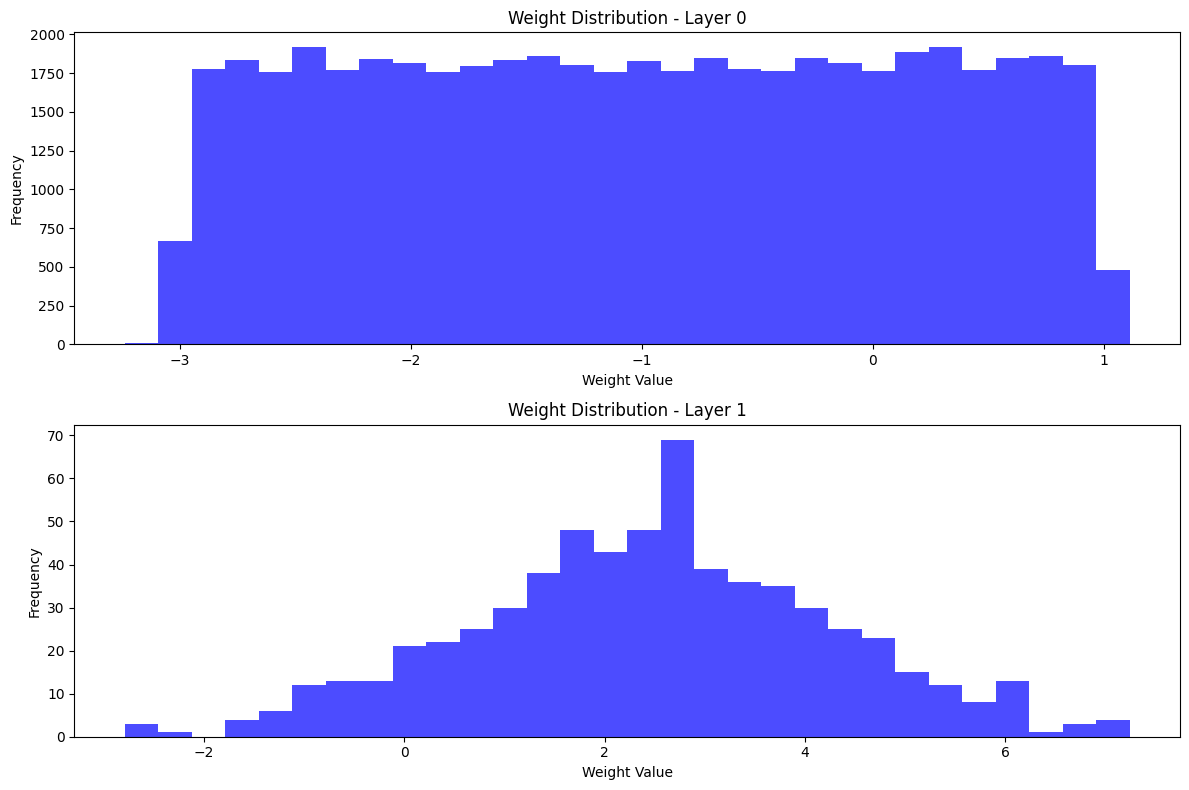

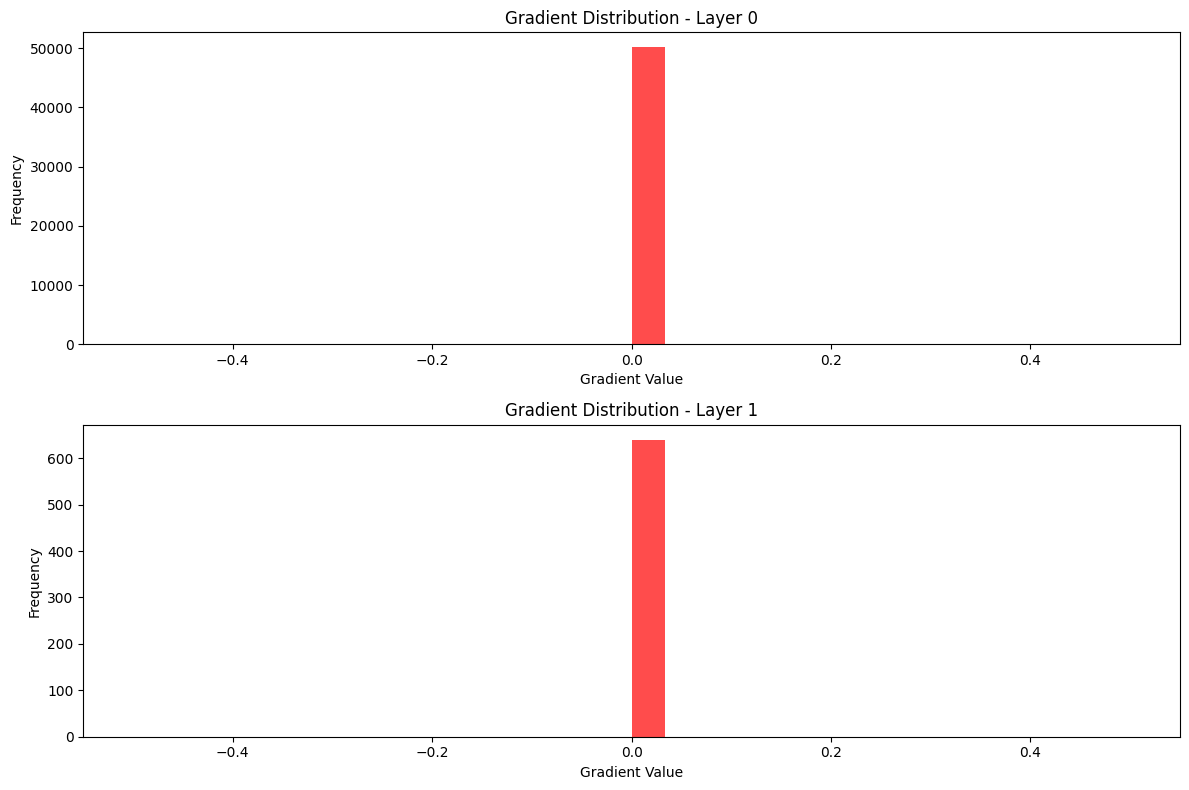

In [ ]:
# Random Uniform (custom)
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["relu", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["random_uniform","random_uniform"], weight_init_params=[{"lower" : -3}, {"upper" : 6}])
ann.train(X_train, y_train, batch_size=32, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Random Uniform (custom)")
predictions = ann.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

Training Progress:   5%|▌         | 1/20 [00:00<00:14,  1.27it/s]

Epoch 0/20 - Train Loss: 14.0846 - Val Loss: 10.536915938605583


Training Progress:  15%|█▌        | 3/20 [00:02<00:12,  1.41it/s]

Epoch 2/20 - Train Loss: 7.0192 - Val Loss: 7.054066165676006


Training Progress:  25%|██▌       | 5/20 [00:03<00:10,  1.41it/s]

Epoch 4/20 - Train Loss: 5.8500 - Val Loss: 6.406608529542365


Training Progress:  35%|███▌      | 7/20 [00:04<00:09,  1.43it/s]

Epoch 6/20 - Train Loss: 5.5723 - Val Loss: 6.075381493489284


Training Progress:  45%|████▌     | 9/20 [00:06<00:08,  1.24it/s]

Epoch 8/20 - Train Loss: 5.3850 - Val Loss: 6.006665841826996


Training Progress:  55%|█████▌    | 11/20 [00:09<00:10,  1.14s/it]

Epoch 10/20 - Train Loss: 5.4967 - Val Loss: 6.359553801977001


Training Progress:  65%|██████▌   | 13/20 [00:11<00:07,  1.03s/it]

Epoch 12/20 - Train Loss: 5.6150 - Val Loss: 5.838250006713583


Training Progress:  75%|███████▌  | 15/20 [00:12<00:04,  1.14it/s]

Epoch 14/20 - Train Loss: 5.7504 - Val Loss: 7.092518694219121


Training Progress:  85%|████████▌ | 17/20 [00:14<00:02,  1.22it/s]

Epoch 16/20 - Train Loss: 5.9049 - Val Loss: 6.351854336985263


Training Progress:  95%|█████████▌| 19/20 [00:15<00:00,  1.31it/s]

Epoch 18/20 - Train Loss: 6.1078 - Val Loss: 6.070661582377363


Training Progress: 100%|██████████| 20/20 [00:16<00:00,  1.20it/s]


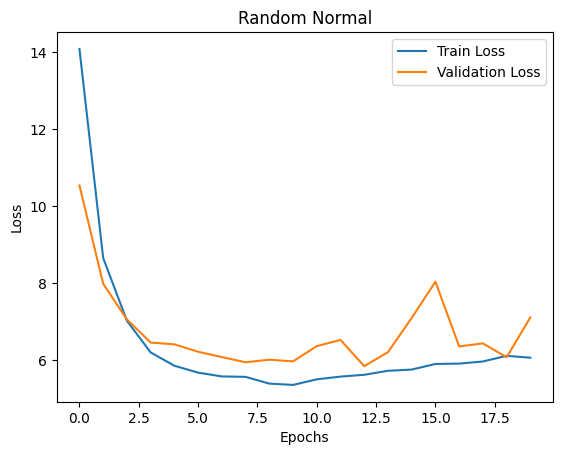

Accuracy: 0.6619


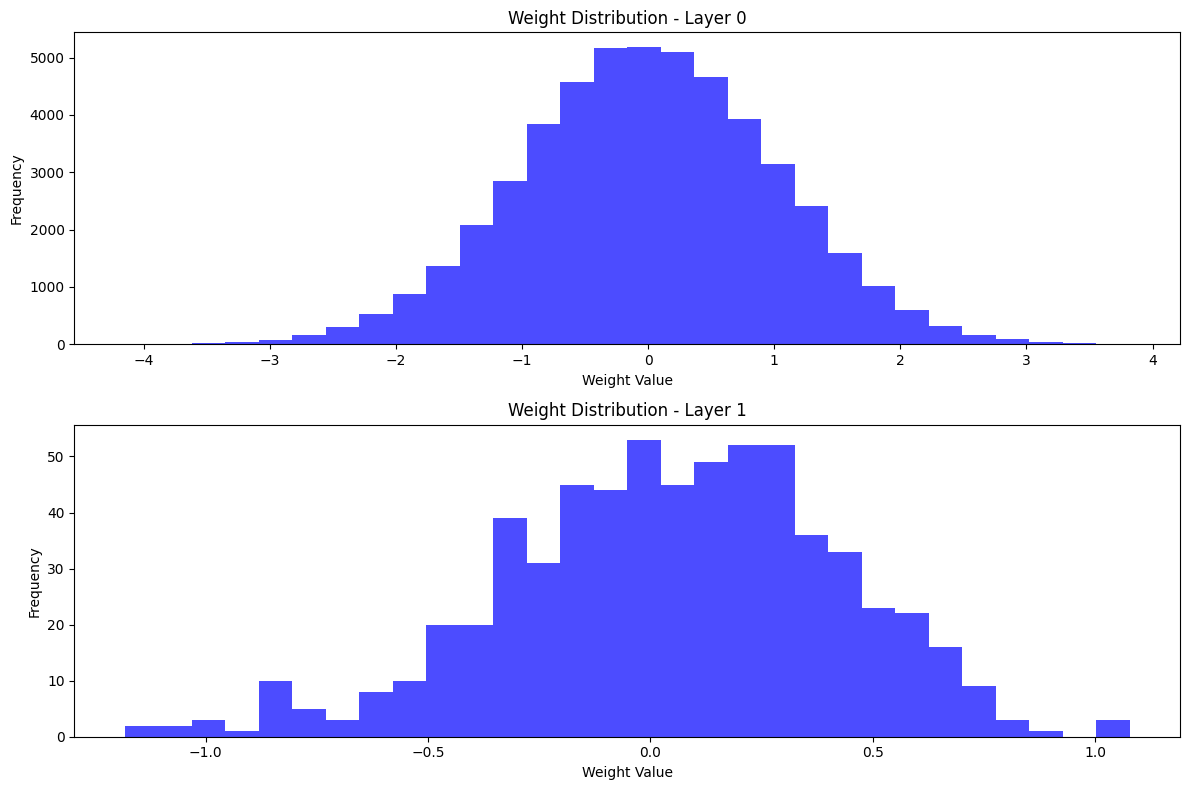

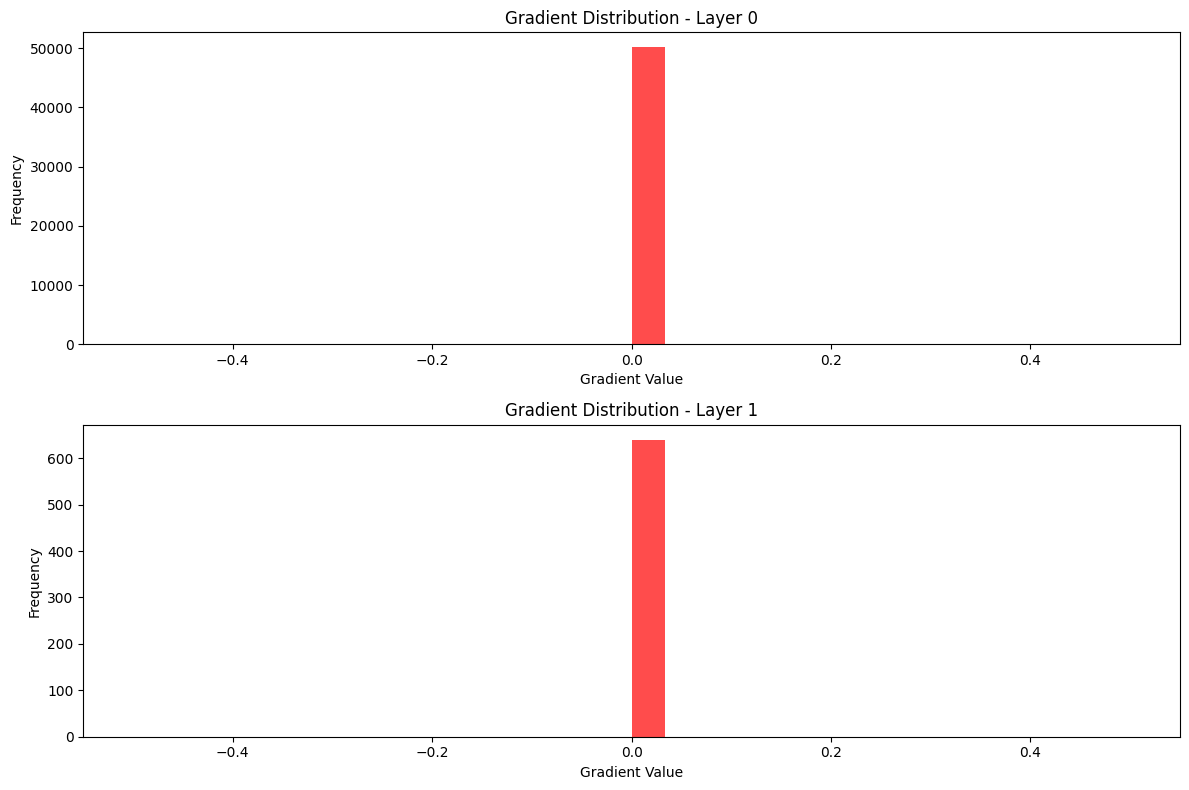

In [ ]:
# Random Normal
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["relu", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["random_normal","random_normal"], weight_init_params=[{"seed" : 66}, {"seed" : 66}])
ann.train(X_train, y_train, batch_size=32, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Random Normal")
predictions = ann.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

Training Progress:   5%|▌         | 1/20 [00:00<00:17,  1.06it/s]

Epoch 0/20 - Train Loss: 18.8888 - Val Loss: 18.266835428380887


Training Progress:  15%|█▌        | 3/20 [00:03<00:18,  1.09s/it]

Epoch 2/20 - Train Loss: 18.4032 - Val Loss: 18.39135314803153


Training Progress:  25%|██▌       | 5/20 [00:09<00:34,  2.28s/it]

Epoch 4/20 - Train Loss: 18.1656 - Val Loss: 18.51195560277714


Training Progress:  35%|███▌      | 7/20 [00:16<00:38,  2.96s/it]

Epoch 6/20 - Train Loss: 18.0641 - Val Loss: 17.842978333513138


Training Progress:  45%|████▌     | 9/20 [00:20<00:26,  2.45s/it]

Epoch 8/20 - Train Loss: 17.9620 - Val Loss: 17.99203277988158


Training Progress:  55%|█████▌    | 11/20 [00:28<00:27,  3.09s/it]

Epoch 10/20 - Train Loss: 17.7617 - Val Loss: 17.28866976014778


Training Progress:  65%|██████▌   | 13/20 [00:32<00:17,  2.55s/it]

Epoch 12/20 - Train Loss: 17.5727 - Val Loss: 18.227489069565408


Training Progress:  75%|███████▌  | 15/20 [00:34<00:09,  1.85s/it]

Epoch 14/20 - Train Loss: 17.5694 - Val Loss: 18.09844530607076


Training Progress:  85%|████████▌ | 17/20 [00:36<00:04,  1.39s/it]

Epoch 16/20 - Train Loss: 17.1344 - Val Loss: 18.1761528330161


Training Progress:  95%|█████████▌| 19/20 [00:39<00:01,  1.32s/it]

Epoch 18/20 - Train Loss: 17.0694 - Val Loss: 15.993086195727734


Training Progress: 100%|██████████| 20/20 [00:40<00:00,  2.00s/it]


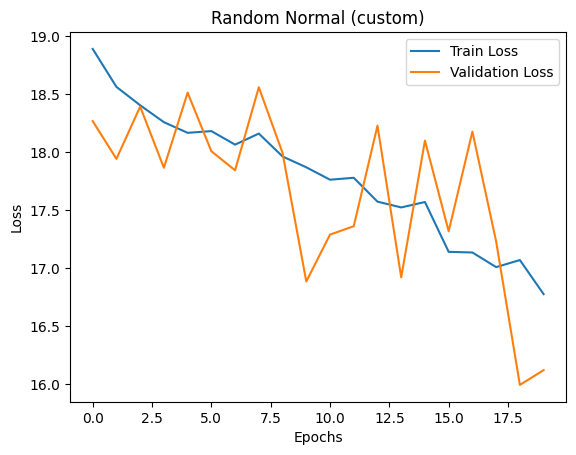

Accuracy: 0.2693


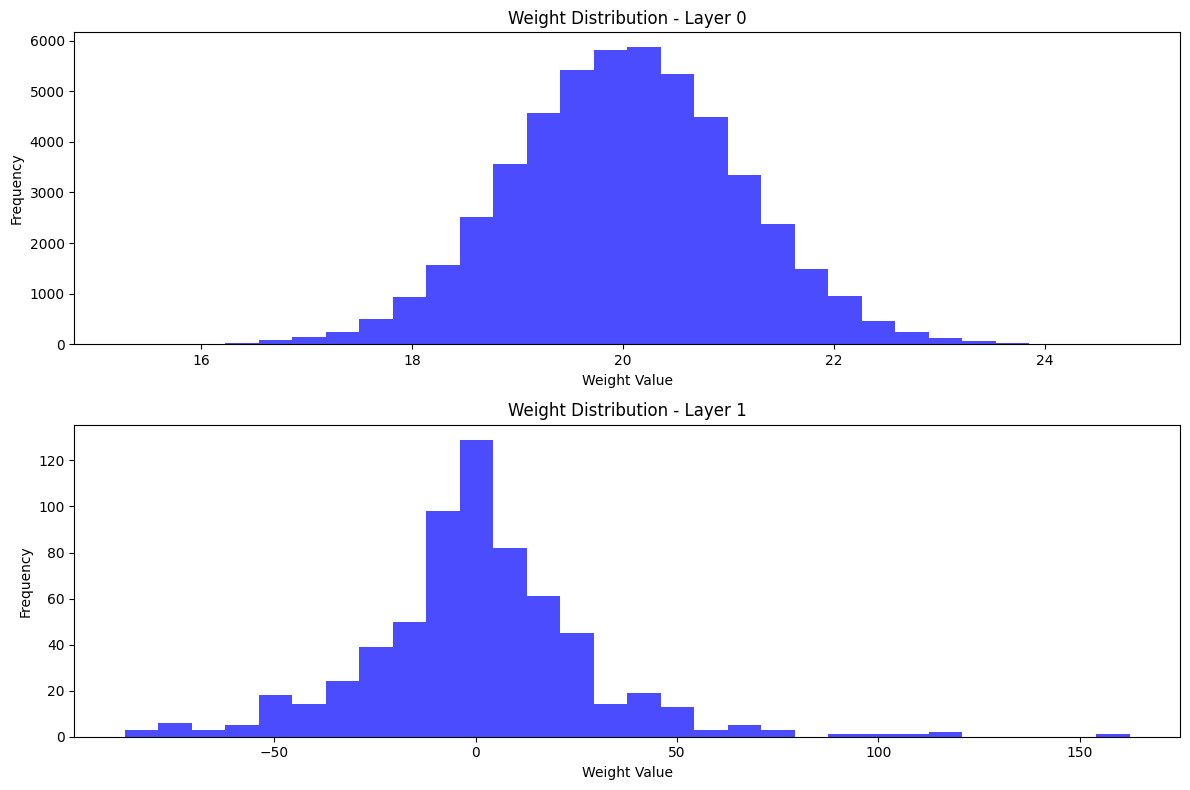

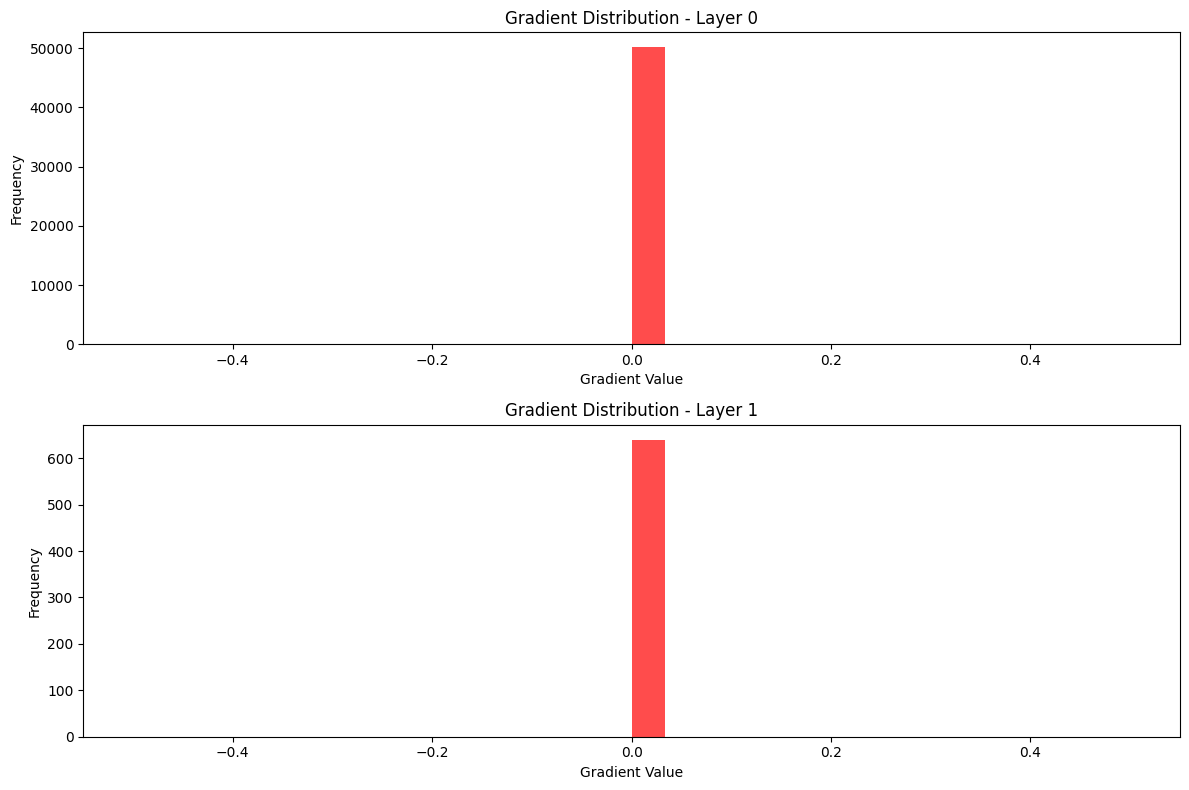

In [ ]:
# Random Normal (custom)
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["relu", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["random_normal","random_normal"], weight_init_params=[{"mean" : 20}, {"variance" : 5}])
ann.train(X_train, y_train, batch_size=32, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Random Normal (custom)")
predictions = ann.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

Training Progress:   5%|▌         | 1/20 [00:00<00:14,  1.33it/s]

Epoch 0/20 - Train Loss: 17.6976 - Val Loss: 16.514146092319493


Training Progress:  15%|█▌        | 3/20 [00:02<00:12,  1.34it/s]

Epoch 2/20 - Train Loss: 13.6813 - Val Loss: 12.930558166345369


Training Progress:  25%|██▌       | 5/20 [00:03<00:11,  1.29it/s]

Epoch 4/20 - Train Loss: 11.1391 - Val Loss: 10.754207283203085


Training Progress:  35%|███▌      | 7/20 [00:05<00:09,  1.34it/s]

Epoch 6/20 - Train Loss: 9.5997 - Val Loss: 9.33818102768087


Training Progress:  45%|████▌     | 9/20 [00:06<00:08,  1.35it/s]

Epoch 8/20 - Train Loss: 8.5325 - Val Loss: 8.50581072997898


Training Progress:  55%|█████▌    | 11/20 [00:09<00:09,  1.01s/it]

Epoch 10/20 - Train Loss: 7.7635 - Val Loss: 7.756289298951524


Training Progress:  65%|██████▌   | 13/20 [00:11<00:07,  1.00s/it]

Epoch 12/20 - Train Loss: 7.1994 - Val Loss: 7.259606726075013


Training Progress:  75%|███████▌  | 15/20 [00:12<00:04,  1.18it/s]

Epoch 14/20 - Train Loss: 6.7423 - Val Loss: 6.878706651471369


Training Progress:  85%|████████▌ | 17/20 [00:14<00:02,  1.25it/s]

Epoch 16/20 - Train Loss: 6.3736 - Val Loss: 6.499652491177571


Training Progress:  95%|█████████▌| 19/20 [00:15<00:00,  1.34it/s]

Epoch 18/20 - Train Loss: 6.0555 - Val Loss: 6.239058680300086


Training Progress: 100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


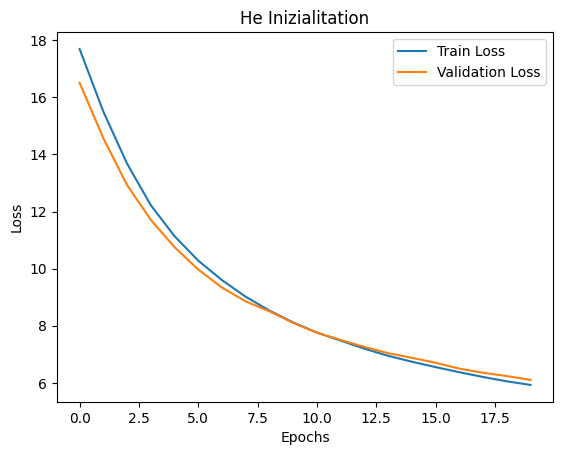

Accuracy: 0.8281


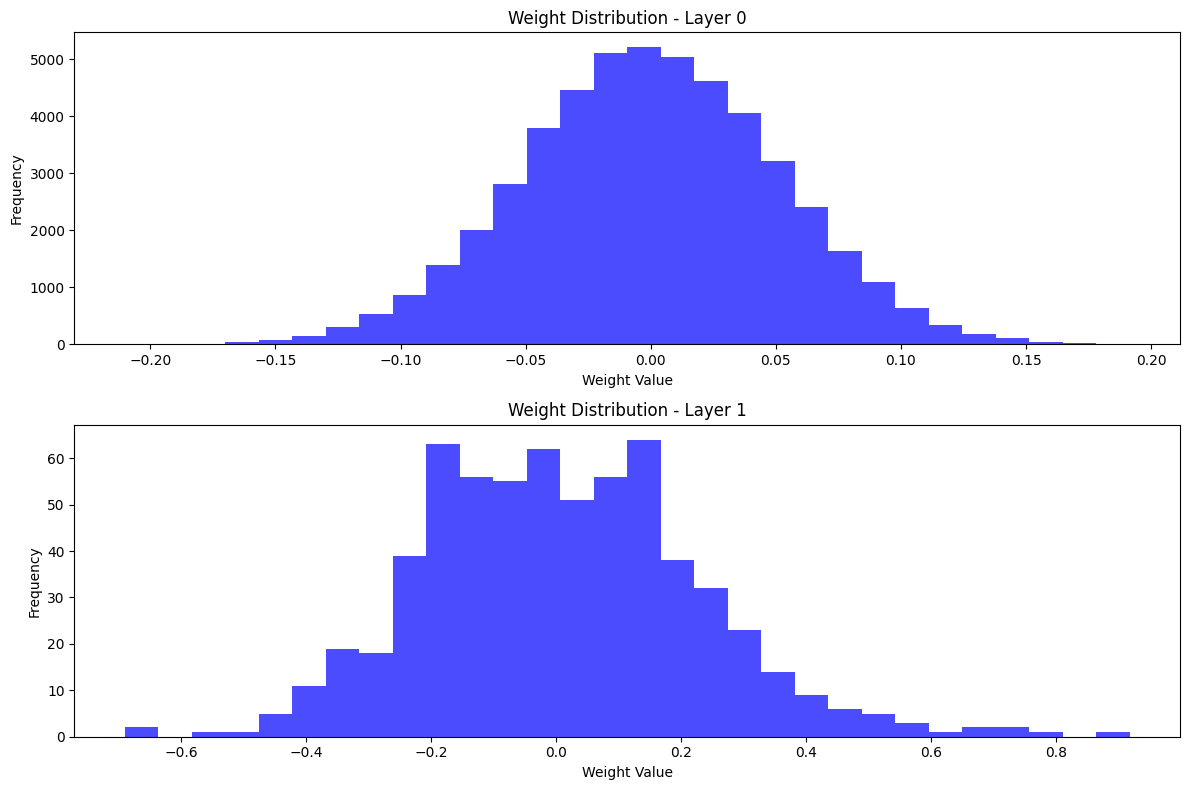

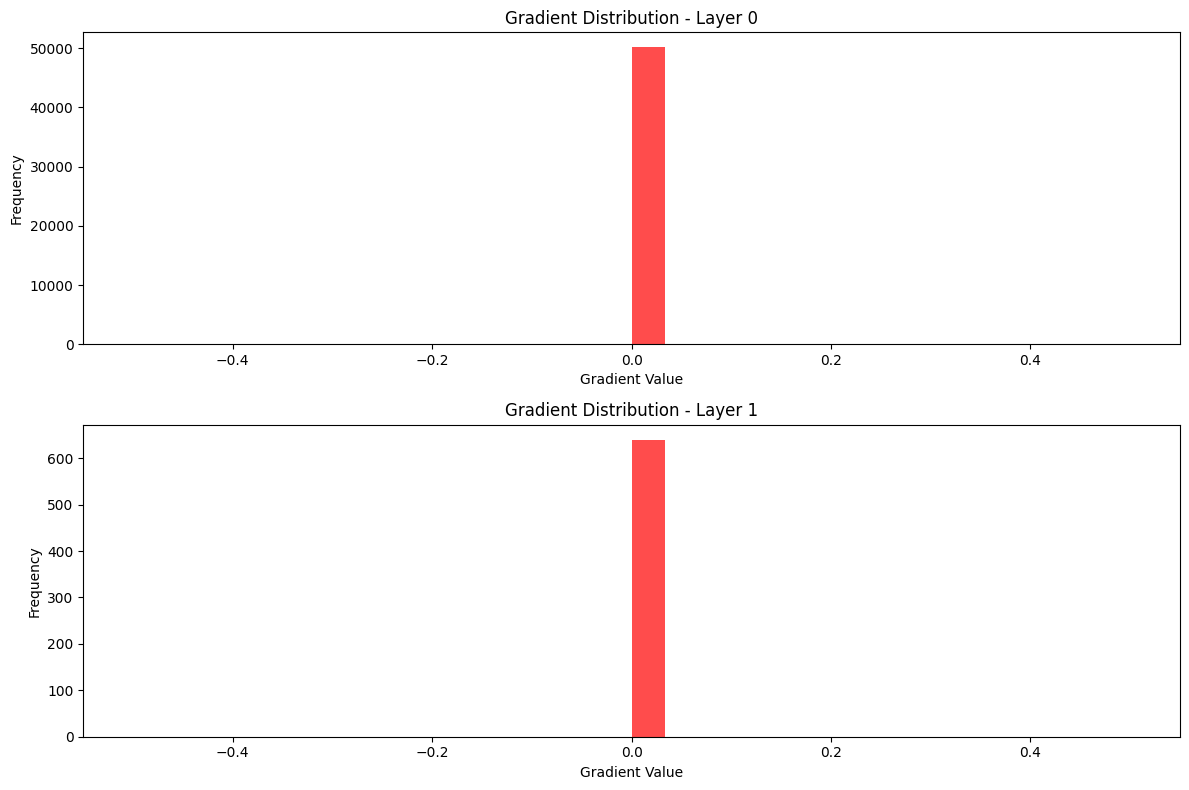

In [ ]:
# He Inizialitation
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["relu", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["he", "he"], weight_init_params=[{"seed" : 66}, {"seed" : 66}])
ann.train(X_train, y_train, batch_size=32, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("He Inizialitation")
predictions = ann.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

Training Progress:   5%|▌         | 1/20 [00:00<00:13,  1.37it/s]

Epoch 0/20 - Train Loss: 18.0936 - Val Loss: 17.297854384542518


Training Progress:  15%|█▌        | 3/20 [00:02<00:11,  1.43it/s]

Epoch 2/20 - Train Loss: 15.1427 - Val Loss: 14.394397260773077


Training Progress:  25%|██▌       | 5/20 [00:03<00:12,  1.22it/s]

Epoch 4/20 - Train Loss: 12.4505 - Val Loss: 11.91870217600865


Training Progress:  35%|███▌      | 7/20 [00:06<00:14,  1.10s/it]

Epoch 6/20 - Train Loss: 10.5241 - Val Loss: 10.149619313095297


Training Progress:  45%|████▌     | 9/20 [00:08<00:09,  1.12it/s]

Epoch 8/20 - Train Loss: 9.1534 - Val Loss: 9.031055326773066


Training Progress:  55%|█████▌    | 11/20 [00:09<00:07,  1.23it/s]

Epoch 10/20 - Train Loss: 8.1777 - Val Loss: 8.103180806074567


Training Progress:  65%|██████▌   | 13/20 [00:11<00:05,  1.31it/s]

Epoch 12/20 - Train Loss: 7.4521 - Val Loss: 7.453196938107398


Training Progress:  75%|███████▌  | 15/20 [00:12<00:03,  1.36it/s]

Epoch 14/20 - Train Loss: 6.8773 - Val Loss: 6.95161105763329


Training Progress:  85%|████████▌ | 17/20 [00:13<00:02,  1.40it/s]

Epoch 16/20 - Train Loss: 6.4173 - Val Loss: 6.50108284637736


Training Progress:  95%|█████████▌| 19/20 [00:15<00:00,  1.43it/s]

Epoch 18/20 - Train Loss: 6.0318 - Val Loss: 6.161103708058152


Training Progress: 100%|██████████| 20/20 [00:15<00:00,  1.25it/s]


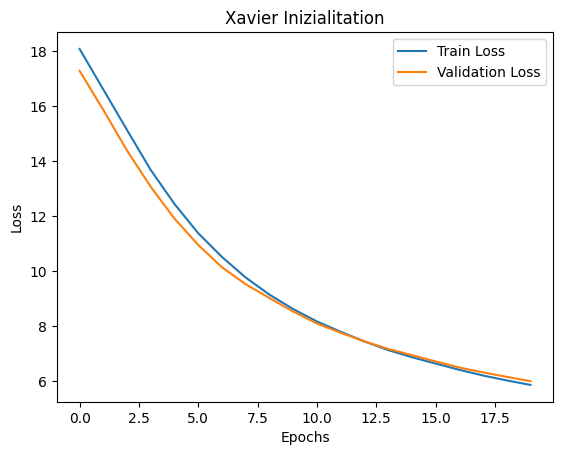

Accuracy: 0.8425


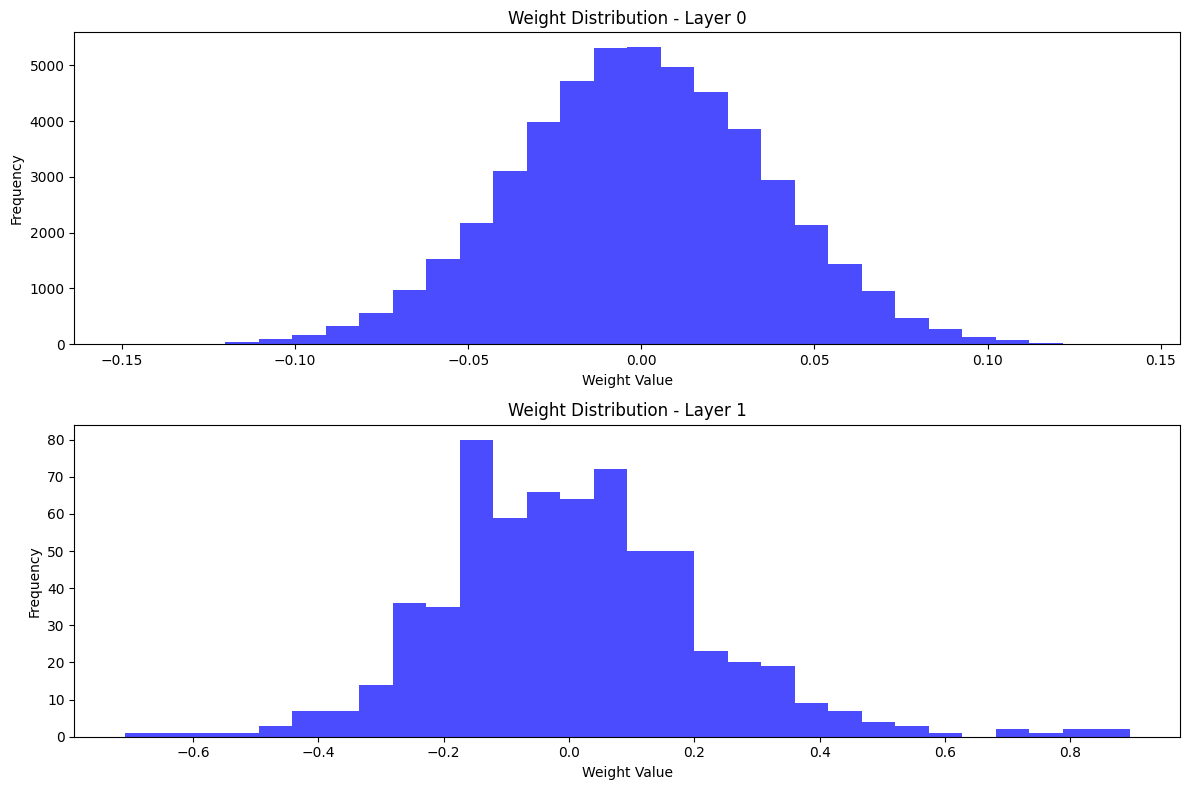

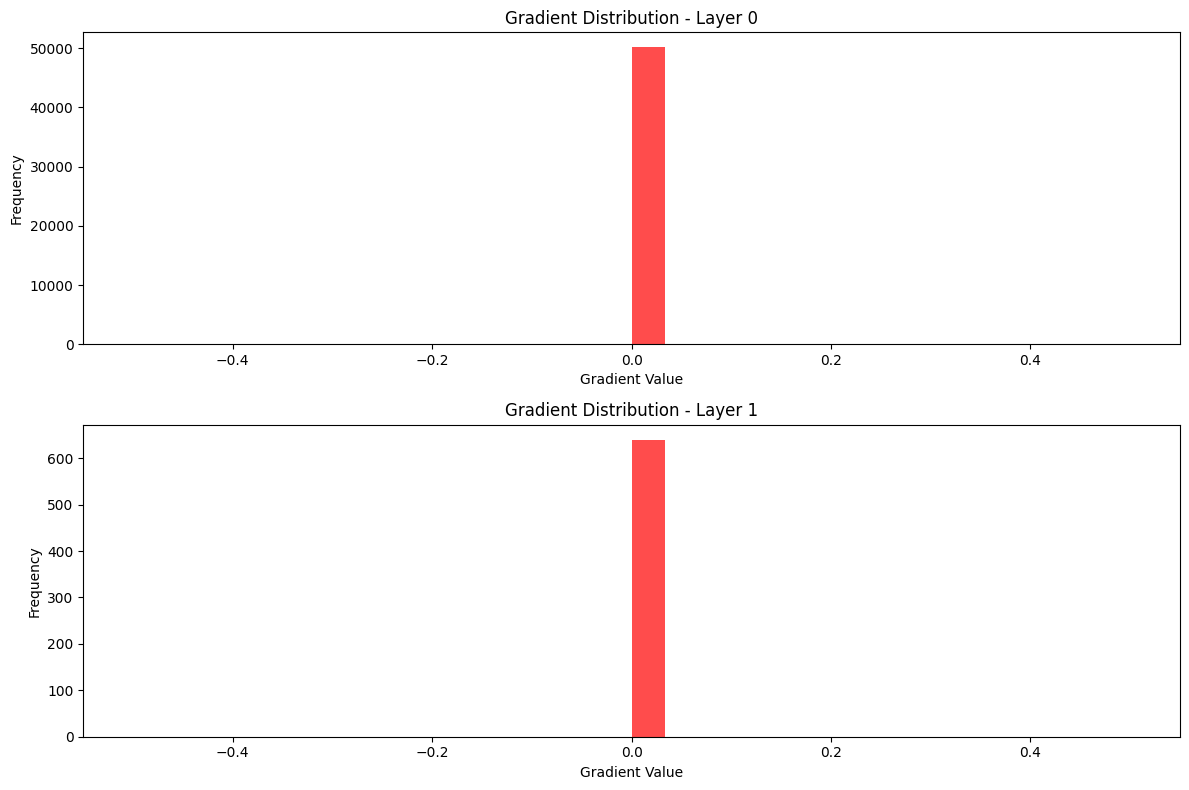

In [ ]:
# Xavier Inizialitation
ann = NeuralNetwork(input_size=784, hidden_layers=[64], output_size=10, activations=["relu", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["xavier", "xavier"], weight_init_params=[{"seed" : 66}, {"seed" : 66}])
ann.train(X_train, y_train, batch_size=32, learning_rate=0.01, epochs=20, X_val=X_test, y_val=y_test)
ann.plot_loss("Xavier Inizialitation")
predictions = ann.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy}")
ann.plot_weight_distribution([0,1])
ann.plot_gradient_distribution([0,1])

# Perbandingan Dengan Model MLP

In [90]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='sgd', max_iter=20, random_state=42, batch_size=1)
mlp.fit(X_train, y_train)

ann = NeuralNetwork(input_size=784, hidden_layers=[64, 32], output_size=10, activations=["relu", "relu", "softmax"], loss_function="categorical_cross_entropy", weight_init_methods=["he", "he", "xavier"], weight_init_params=[{"seed" : 66}, {"seed" : 66}, {"seed" : 66}])
ann.train(X_train, y_train, batch_size=1, learning_rate=0.001, epochs=20, X_val=X_test, y_val=y_test)

y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
y_pred_ann = ann.predict(X_test)
y_pred_ann = np.argmax(y_pred_ann, axis=1)
print()
print("Akurasi MLP:", accuracy_mlp)
print("Akurasi ANN:", accuracy_score(np.argmax( y_test, axis=1), y_pred_ann))


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
Training Progress:   5%|▌         | 1/20 [00:03<01:09,  3.63s/it]

Epoch 0/20 - Train Loss: 16.7017 - Val Loss: 14.748791088169478


Training Progress:  15%|█▌        | 3/20 [00:09<00:55,  3.25s/it]

Epoch 2/20 - Train Loss: 11.2382 - Val Loss: 10.649706549125655


Training Progress:  25%|██▌       | 5/20 [00:16<00:49,  3.28s/it]

Epoch 4/20 - Train Loss: 9.4005 - Val Loss: 9.376837107780084


Training Progress:  35%|███▌      | 7/20 [00:21<00:38,  2.98s/it]

Epoch 6/20 - Train Loss: 8.3896 - Val Loss: 8.536463931363148


Training Progress:  45%|████▌     | 9/20 [00:28<00:34,  3.12s/it]

Epoch 8/20 - Train Loss: 7.7255 - Val Loss: 7.849531199547149


Training Progress:  55%|█████▌    | 11/20 [00:33<00:25,  2.88s/it]

Epoch 10/20 - Train Loss: 7.0938 - Val Loss: 7.2288983397742586


Training Progress:  65%|██████▌   | 13/20 [00:39<00:20,  2.96s/it]

Epoch 12/20 - Train Loss: 6.4973 - Val Loss: 6.813758331918081


Training Progress:  75%|███████▌  | 15/20 [00:45<00:14,  3.00s/it]

Epoch 14/20 - Train Loss: 6.0484 - Val Loss: 6.466972780652149


Training Progress:  85%|████████▌ | 17/20 [00:51<00:08,  2.95s/it]

Epoch 16/20 - Train Loss: 5.6671 - Val Loss: 5.983244150596192


Training Progress:  95%|█████████▌| 19/20 [00:57<00:02,  2.94s/it]

Epoch 18/20 - Train Loss: 5.4030 - Val Loss: 5.6540013849860316


Training Progress: 100%|██████████| 20/20 [01:00<00:00,  3.01s/it]


Akurasi MLP: 0.8987
Akurasi ANN: 0.814


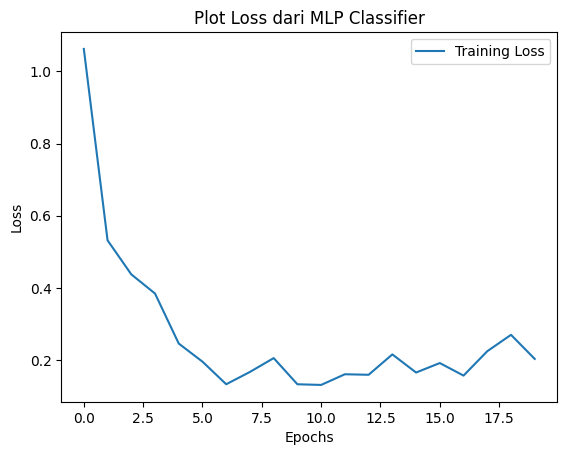

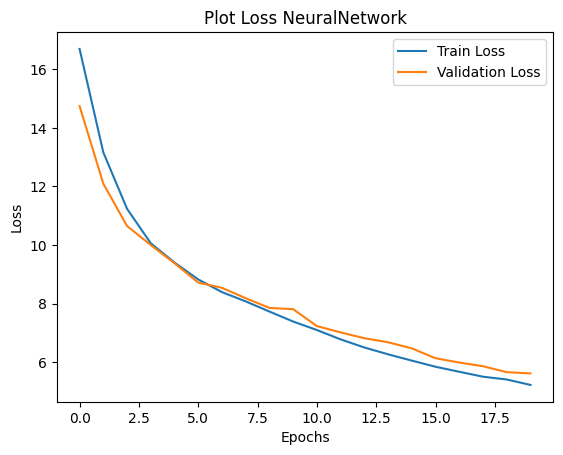

In [96]:
# Plot loss function
plt.plot(mlp.loss_curve_, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot Loss dari MLP Classifier")
plt.legend()
plt.show()

ann.plot_loss("Plot Loss NeuralNetwork")